<h1><center>Travel Package Purchase Prediction - Ensemble Techniques </center></h1>

## Background and Context

As a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps us to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

As a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective
-  To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary 


### Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Let's start coding!

### Installing  necessary library

In [1]:
%%capture
#discard the output of this cell

!pip install xgboost

### Loading necessary libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 50)

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

## load libraries for metric calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score

## load Ensemble library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier


### Load the data for analysis

In [3]:
data=pd.read_excel('Tourism.xlsx',sheet_name=1)
df = data.copy()

### Shape of the data

In [4]:
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1])+" columns") 

There are 4888 rows and 20 columns


### Let's view a sample of the dataset.

In [5]:
np.random.seed(2)  # To get the same random results every time
df.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2055,202055,1,23.0,Self Enquiry,1,12.0,Salaried,Male,3,1.0,Basic,5.0,Married,2.0,1,3,0,0.0,Executive,16601.0
3626,203626,0,37.0,Company Invited,1,7.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,2.0,0,5,1,2.0,Manager,23052.0
4812,204812,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Married,5.0,0,5,1,1.0,VP,38418.0
3047,203047,0,46.0,Self Enquiry,1,9.0,Salaried,Female,4,5.0,Basic,3.0,Single,3.0,0,3,1,2.0,Executive,20952.0
121,200121,0,33.0,Company Invited,3,28.0,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,1.0,0,2,0,1.0,Manager,21146.0
278,200278,0,26.0,Company Invited,1,6.0,Salaried,Female,2,3.0,Deluxe,4.0,Married,2.0,0,5,0,1.0,Manager,21397.0
3507,203507,0,30.0,Self Enquiry,3,26.0,Salaried,Male,4,5.0,Deluxe,3.0,Married,3.0,0,4,1,1.0,Manager,27298.0
3536,203536,0,46.0,Self Enquiry,1,35.0,Large Business,Male,4,4.0,Basic,3.0,Married,6.0,0,3,1,3.0,Executive,20810.0
1623,201623,0,45.0,Self Enquiry,1,15.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,1.0,0,4,1,0.0,Manager,17348.0
1740,201740,0,55.0,Self Enquiry,1,6.0,Small Business,Male,2,3.0,King,5.0,Single,1.0,1,1,1,1.0,VP,34045.0


### Duplicate values in the data

In [6]:
df.duplicated().sum()

0

### Missing values (count) in the data.

In [7]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

### Missing values (Percentage) in the data

In [8]:
dfMissingPercentage = df.isna().sum() / df.isna().count() * 100
dfMissingPercentage.apply(lambda x: round(x,2)).sort_values(ascending=False)

DurationOfPitch             5.14
MonthlyIncome               4.77
Age                         4.62
NumberOfTrips               2.86
NumberOfChildrenVisiting    1.35
NumberOfFollowups           0.92
PreferredPropertyStar       0.53
TypeofContact               0.51
Designation                 0.00
OwnCar                      0.00
PitchSatisfactionScore      0.00
Passport                    0.00
CustomerID                  0.00
MaritalStatus               0.00
ProdTaken                   0.00
NumberOfPersonVisiting      0.00
Gender                      0.00
Occupation                  0.00
CityTier                    0.00
ProductPitched              0.00
dtype: float64

### Unique values (count) in the data.

In [9]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

### Data types of the columns in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Summary of the dataset

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observation**
* There are 4888 rows and 20 columns
* No duplicate records
* DurationOfPitch has 5.14% values missing, MonthlyIncome has 4.77% values missig, Age has 4.62% missing values, NumberOfTrips has 2.86% missing values, NumberOfChildrenVisiting has missing 1.35% values, 0.92% of missing values for NumberOfFollowups, 0.53% of missing values for PreferredPropertyStar and 0.51% of missing values for TypeofContact.
* ProdTaken, TypeofContact, CityTier, Occupation, Gender, ProductPitched, MaritalStatus, Passport, Designation, OwnCar and PitchSatisfactionScore is categorical variables
* Montly average income of customers are 23619.85, maximum income of customer is 98678 and minimum 1000, %0% percent customers has income 22347
* Maximum age of the customer is 61 and minimum is 18, and 50% of the customers age is 36.
* Average Duration of pitch is 15.5 and maximum is 127 and mimimum is 5.
* Only 0.188 or 18.8% percent customers has taken product.
* 50% of the PitchSatisfactionScore is 3
* There is 3 different gender types, we have to check this.

## Data Preprocessing

### CustomerID
CustomerID column is a sequencial number assigned to each customer, this doesn't add any value for analysis. Hence dropping of the column 

In [12]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.shape

(4888, 19)

### Gender
As we have seen above Gender column has three unique values, lets analyze those

In [13]:
df.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

We can see that there is a typo in gender value, we need to correct this. Female and Fe male is both same.

In [14]:
df.loc[df['Gender']=='Fe Male','Gender']='Female'

In [15]:
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

### PreferredPropertyStar

In [16]:
print ("Total number of missing values: " + str(df.PreferredPropertyStar.isnull().sum()))

Total number of missing values: 26


In [17]:
df.PreferredPropertyStar.value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

In [18]:
df.groupby(['Designation','CityTier'])['PreferredPropertyStar'].median()

Designation     CityTier
AVP             1           3.0
                2           3.0
                3           3.0
Executive       1           3.0
                2           3.0
                3           3.0
Manager         1           3.0
                2           4.0
                3           3.0
Senior Manager  1           3.0
                2           5.0
                3           3.0
VP              1           3.0
                2           3.0
                3           3.0
Name: PreferredPropertyStar, dtype: float64

It appears Designation and Citytier play roles in PreferredPropertyStar, Lets fillup missing values using this.

In [19]:
df['PreferredPropertyStar']=df.groupby(['Designation','CityTier'])['PreferredPropertyStar'].apply(lambda x:x.fillna(x.median()))

In [20]:
df.PreferredPropertyStar.isnull().sum()

0

### TypeofContact

In [21]:
print ("Total number of missing values: " + str(df.TypeofContact.isnull().sum()))

Total number of missing values: 25


In [22]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

`Self Enquiry` is the maximum number times appeared, lets fillup the missing value with **Self Enquiry**

In [23]:
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')
df['TypeofContact'].value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

In [24]:
df.TypeofContact.isnull().sum()

0

### NumberOfFollowups

In [25]:
print ("Total number of missing values: " + str(df.NumberOfFollowups.isnull().sum()))

Total number of missing values: 45


In [26]:
df.NumberOfFollowups.value_counts()

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

In [27]:
df.groupby(['ProductPitched','MaritalStatus'])['NumberOfFollowups'].median()

ProductPitched  MaritalStatus
Basic           Divorced         4.0
                Married          4.0
                Single           4.0
                Unmarried        4.0
Deluxe          Divorced         4.0
                Married          4.0
                Single           3.0
                Unmarried        4.0
King            Divorced         4.0
                Married          4.0
                Single           4.0
Standard        Divorced         4.0
                Married          4.0
                Single           4.0
                Unmarried        4.0
Super Deluxe    Divorced         4.0
                Married          4.0
                Single           4.0
                Unmarried        3.0
Name: NumberOfFollowups, dtype: float64

It seems 'ProductPitched' and 'MaritalStatus' determines somewhat number of followup, It is seen that Single or Unmarried Status has number of followup as 3 otherwise its 4. Lets use this to fillup missing value

In [28]:
df['NumberOfFollowups']=df.groupby(['ProductPitched','MaritalStatus'])['NumberOfFollowups'].apply(lambda x:x.fillna(x.median()))

In [29]:
df.NumberOfFollowups.isnull().sum()

0

### NumberOfChildrenVisiting

In [30]:
print ("Total number of missing values: " + str(df.NumberOfChildrenVisiting.isnull().sum()))

Total number of missing values: 66


In [31]:
df.NumberOfChildrenVisiting.value_counts()

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64

Assuming these customers don't have any childer and hence it was missing, lets fillup with 0

In [32]:
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)
df['NumberOfChildrenVisiting'].value_counts()

1.0    2080
2.0    1335
0.0    1148
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64

### NumberOfTrips

In [33]:
print ("Total number of missing values: " + str(df.NumberOfTrips.isnull().sum()))

Total number of missing values: 140


In [34]:
df.groupby(['MaritalStatus'])['NumberOfTrips'].median()

MaritalStatus
Divorced     3.0
Married      3.0
Single       2.0
Unmarried    3.0
Name: NumberOfTrips, dtype: float64

Marital Status (single) has on a average to visits, rest of them has 3 visits.

In [35]:
df['NumberOfTrips']=df.groupby(['MaritalStatus'])['NumberOfTrips'].apply(lambda x:x.fillna(x.median()))

In [36]:
df.NumberOfFollowups.isnull().sum()

0

### Age

In [37]:
print ("Total number of missing values: " + str(df.Age.isnull().sum()))

Total number of missing values: 226


In [38]:
# To get the same random results every time
np.random.seed(2) 

# Print 5 random rows where age is not null
df[~df["Age"].isnull()].sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1784,0,39.0,Self Enquiry,1,16.0,Small Business,Male,3,3.0,Super Deluxe,5.0,Married,2.0,1,3,1,2.0,AVP,32068.0
1634,0,27.0,Company Invited,1,9.0,Small Business,Male,3,4.0,Basic,3.0,Married,2.0,1,1,0,2.0,Executive,17566.0
2208,0,39.0,Self Enquiry,1,6.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Married,2.0,0,3,1,0.0,AVP,27742.0
4393,1,25.0,Company Invited,1,14.0,Salaried,Female,3,4.0,Basic,3.0,Married,3.0,1,4,0,1.0,Executive,21564.0
520,0,48.0,Self Enquiry,3,8.0,Small Business,Male,2,2.0,Deluxe,4.0,Divorced,4.0,0,3,1,0.0,Manager,23120.0


Considering Designation changes with experience and with age experience increase. I believe age of a individual is somewhats relates to his disgnation, sometimes designation also depends upon organization type and gender. Considering this we will try to fillup the missing value for age. 

In [39]:
df['Age']=df.groupby(['Occupation','Designation','Gender'])['Age'].apply(lambda x:x.fillna(x.median()))
df.Age.isnull().sum()

0

### MonthlyIncome

In [40]:
print ("Total number of missing values: " + str(df.MonthlyIncome.isnull().sum()))

Total number of missing values: 233


As we already know that `MonthlyIncome` is directly related to is position in the organization, how big the orgranization is and also gender of the individual and in which city they are working (metro city salary is higher, whereas small city salary will be slightly lesser)

In [41]:
df.groupby(['Occupation','Designation','CityTier','Gender'])['MonthlyIncome'].median()

Occupation      Designation  CityTier  Gender
Free Lancer     Executive    1         Male      18929.0
Large Business  AVP          1         Female    31762.0
                             3         Female    31887.5
                                       Male      29959.0
                Executive    1         Female    20748.0
                                                  ...   
Small Business  VP           1         Female    35720.0
                                       Male      36124.0
                             2         Male      35039.0
                             3         Female    34845.0
                                       Male      35862.0
Name: MonthlyIncome, Length: 76, dtype: float64

Lets fillup the missing value using above groupby technique.

In [42]:
df['MonthlyIncome']=df.groupby(['Occupation','Designation','CityTier','Gender'])['MonthlyIncome'].apply(lambda x:x.fillna(x.median()))
df.MonthlyIncome.isnull().sum()

0

### DurationOfPitch

5.14% of values is missing in this field, lets try to fillup missing values

In [43]:
print ("Total number of missing values: " + str(df.DurationOfPitch.isnull().sum()))

Total number of missing values: 251


In [44]:
# To get the same random results every time
np.random.seed(2) 

# Print 5 random rows where DurationOfPitch is not null
df[~df["DurationOfPitch"].isnull()].sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2947,0,35.0,Self Enquiry,1,7.0,Salaried,Male,3,4.0,Basic,3.0,Divorced,3.0,0,3,1,1.0,Executive,21369.0
259,1,30.0,Company Invited,1,35.0,Small Business,Male,3,4.0,Basic,4.0,Single,1.0,0,3,1,2.0,Executive,18479.0
1004,0,33.0,Self Enquiry,1,13.0,Salaried,Male,3,1.0,Basic,5.0,Single,1.0,0,1,1,0.0,Executive,18578.0
92,0,30.0,Self Enquiry,3,10.0,Small Business,Female,3,4.0,Deluxe,4.0,Married,2.0,1,3,1,1.0,Manager,20209.0
223,0,38.0,Self Enquiry,3,9.0,Salaried,Male,3,3.0,Standard,3.0,Married,1.0,0,2,1,1.0,Senior Manager,25609.0


In [45]:
df.groupby(['ProductPitched','TypeofContact','NumberOfTrips'])['DurationOfPitch'].median()

ProductPitched  TypeofContact    NumberOfTrips
Basic           Company Invited  1.0              11.5
                                 2.0              13.0
                                 3.0              14.0
                                 4.0              14.0
                                 5.0              10.0
                                                  ... 
Super Deluxe    Self Enquiry     4.0              13.0
                                 5.0              14.5
                                 6.0              13.0
                                 7.0              15.0
                                 8.0              15.0
Name: DurationOfPitch, Length: 81, dtype: float64

As we can see above - `DurationOfPitch` slightly depends upon `ProductPitched`, `NumberOfTrips` and `TypeofContact`, using this lets try to fillup the missing values

In [46]:
df['DurationOfPitch']=df.groupby(['ProductPitched','TypeofContact','NumberOfTrips'])['DurationOfPitch'].apply(lambda x:x.fillna(x.median()))
df.MonthlyIncome.isnull().sum()

0

### Lets Checking whether there is any missing value still present or not

In [47]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

All the missing values is now replaced with derived values based on the columns data

### Checking datatypes information

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

####  Fixing DataType 
ProdTaken, TypeofContact, CityTier, Occupation, Gender, ProductPitched, MaritalStatus, Passport, Designation, OwnCar and PitchSatisfactionScore is categorical variable. Lets fix the datatype

In [49]:
dfOriginalAfterPreProcessing=df.copy()

df['ProdTaken'] = df['ProdTaken'].astype('category')
df['TypeofContact'] = df['TypeofContact'].astype('category')
df['CityTier'] = df['CityTier'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['ProductPitched'] = df['ProductPitched'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Passport'] = df['Passport'].astype('category')
df['Designation'] = df['Designation'].astype('category')
df['OwnCar'] = df['OwnCar'].astype('category')
df['PitchSatisfactionScore'] = df['PitchSatisfactionScore'].astype('category')

##displaying dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

### EDA & Data Visualization

In [50]:
### Reuseable methods for drawing graphs

# Adds mean, median and mode line to the graph
def addGrapVLines(df, columnName,plot, title):
    plot.axvline(df[columnName].mean(), color='lightgreen', linestyle='-',linewidth=1)
    plot.axvline(df[columnName].median(), color='red', linestyle='--',linewidth=2)
    plot.axvline(df[columnName].mode()[0], color='orange', linestyle='-',linewidth=1)
    plot.legend({'Mean':df.mean(),'Median':df.median(),'Mode':df.mode()})
    plot.set(title=title)
    
    
# Draws three different types of graph (boxplot,distplot,violinplot) togather 
def drawGraph(df,columnName):
    fig, axes = plt.subplots(ncols=3,figsize=(20, 5))

    
    plot=sns.boxplot(df[columnName],showmeans=True, data=df, ax=axes[0])
    addGrapVLines(df,columnName,plot,"df distribution and skewness for '"+columnName+"'")
    
    plot=sns.distplot(df[columnName],ax=axes[1],hist=True)
    addGrapVLines(df,columnName,plot," Variation in the df distribution for '"+columnName+"'")
    
    plot=sns.violinplot(df[columnName],showmeans=True,ax=axes[2])
    addGrapVLines(df,columnName,plot,"df Distribution for '"+columnName+"'")

    
# Draws Count plot for a particular column    
def drawCountPlot(df,columnName,axes):
    dfPoints=df[columnName]
    indexCount = dfPoints.value_counts().index
    ax = sns.countplot(dfPoints, order=indexCount ,ax=axes)
    for patch in ax.patches:
        percentage = 100 * (patch.get_height()*1.0)/dfPoints.count()
        x = patch.get_x() + patch.get_width() / 2 - 0.05 
        y = patch.get_y() + patch.get_height()
        ax.annotate("{percent:.2f}".format(percent=percentage)+"%", (x, y)) 

# Draws two different types of graph (boxplot,distplot) with hue columntogather
def drawBiVariantGraph(df,columnName,hueColumn):
    fig, axes = plt.subplots(ncols=3,figsize=(15, 5))

    plot=sns.distplot(x=df[df[hueColumn]==0][columnName],ax=axes[0],hist=True,kde=True)
    addGrapVLines(df,columnName,plot,"Variation in the data distribution\n for '"+columnName+"', where "+hueColumn+"=0")

    plot=sns.distplot(x=df[df[hueColumn]==1][columnName],ax=axes[1],hist=True,kde=True)
    addGrapVLines(df,columnName,plot,"Variation in the data distribution\n for '"+columnName+"', where "+hueColumn+"=1")
    
    plot=sns.boxplot(data=df,y=columnName,x=hueColumn,hue=hueColumn, showmeans=True, ax=axes[2])
    plot.set(title="Data distribution and skewness\n for '"+columnName+"'")
    
#Draws boxplot for a given column using a given dataset
def drawBoxPlot(df,columnName,ax):
    plot=sns.boxplot(data=df,x=columnName, showmeans=True, ax=ax)
    plot.set(title="Data distribution and skewness\n for '"+columnName+"'")

#### Univariate Analysis

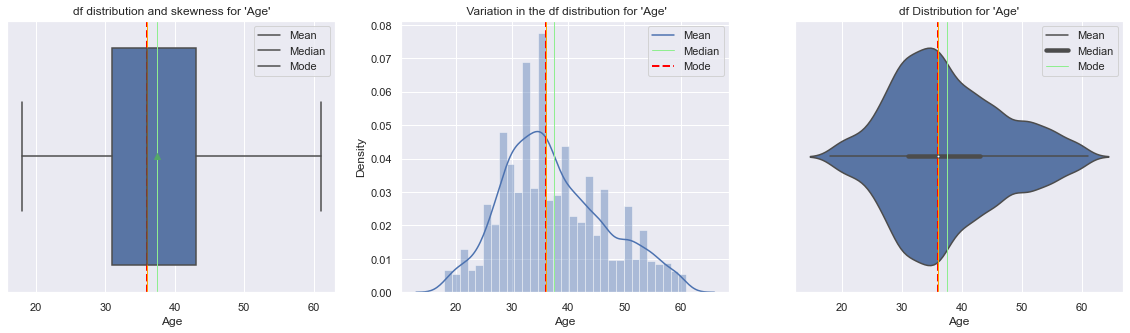

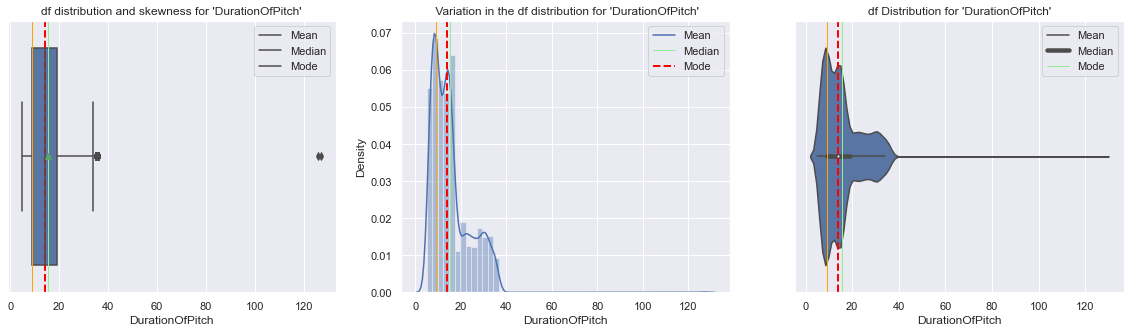

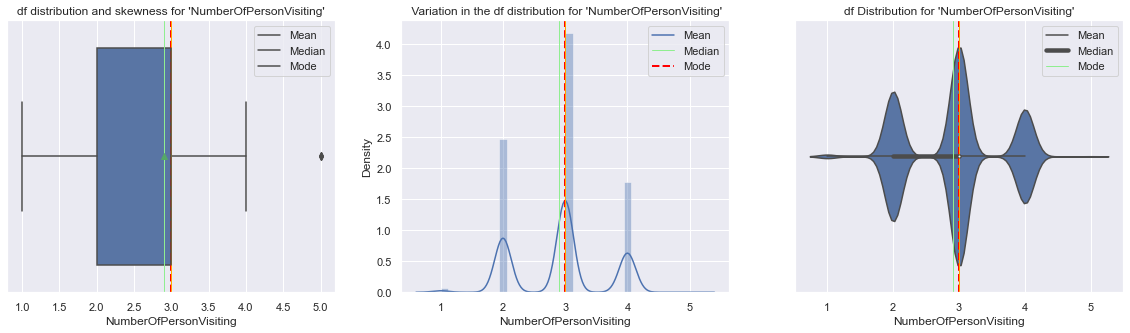

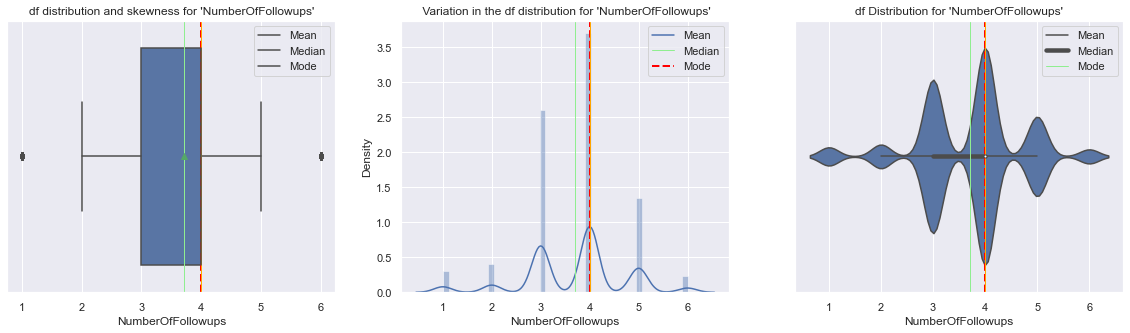

In [51]:
drawGraph(df,'Age')
drawGraph(df,'DurationOfPitch')
drawGraph(df,'NumberOfPersonVisiting')
drawGraph(df,'NumberOfFollowups')

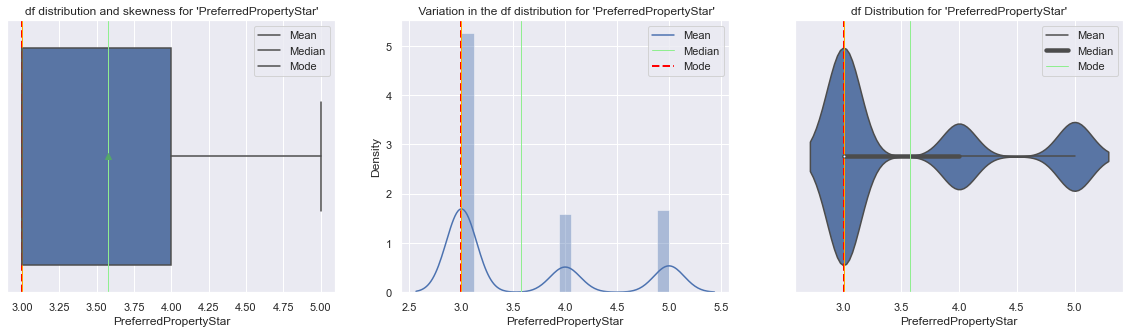

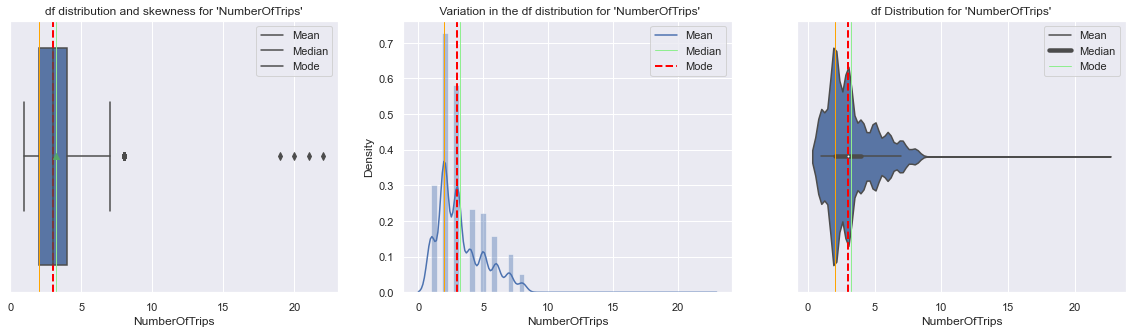

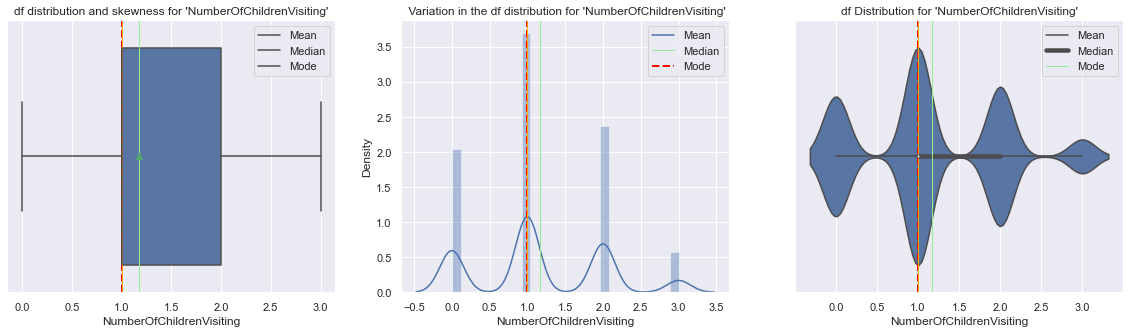

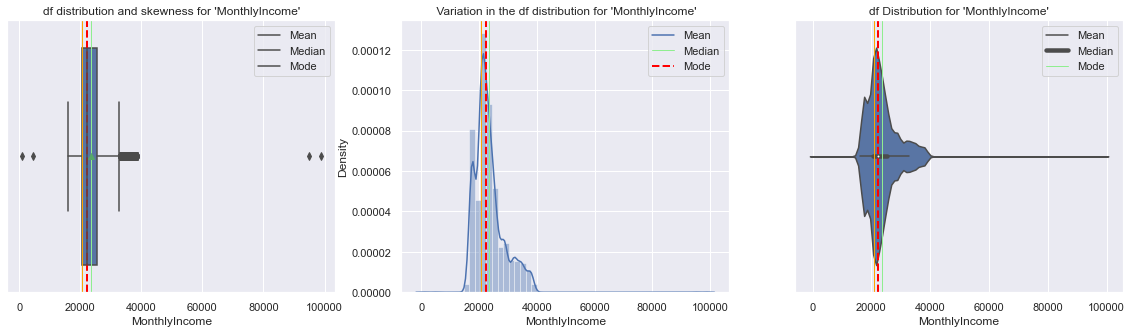

In [52]:
drawGraph(df,'PreferredPropertyStar')
drawGraph(df,'NumberOfTrips')
drawGraph(df,'NumberOfChildrenVisiting')
drawGraph(df,'MonthlyIncome')

**Observation**
* Age doesn't have any outliers and distribution is normal
* DurationOfPitch is skewed right and has outliers
* NumberOfPersonVisiting has outlier around 5.
* NumberOfFollowups has outliers at both extreme ends  ( ie. at 1 and 6)
* PreferredPropertyStar has no ouliers, majority or that star is 3.
* NumberOfTrips has lots of outliers above 10
* NumberOfChildrenVisiting has no outliers
* MonthlyIncome has some skewness and has ouliers both extreme ends ( ie. around 1k-2k and around 100K) 

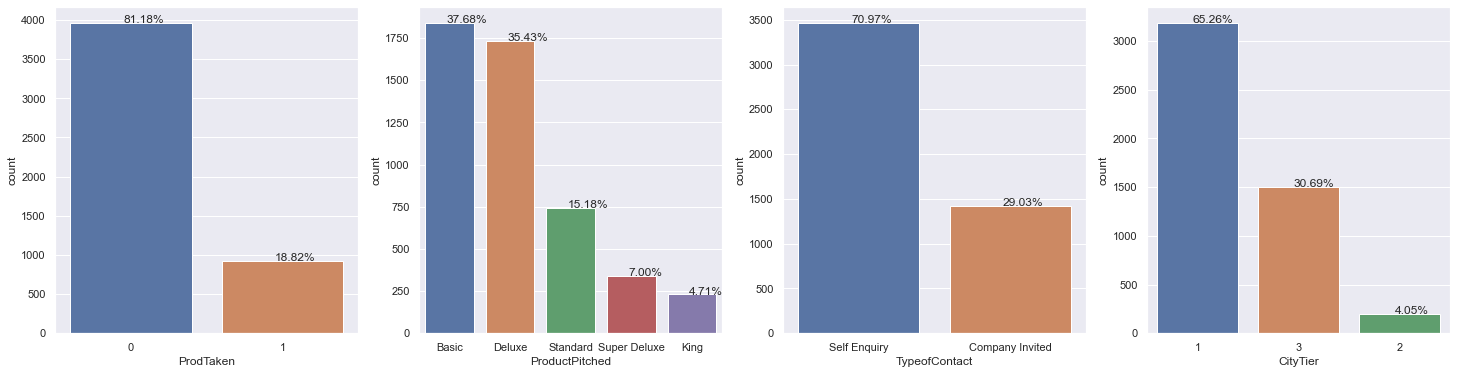

In [53]:
fig, axes = plt.subplots(ncols=4,figsize=(25,6))
drawCountPlot(df,'ProdTaken',axes[0])
drawCountPlot(df,'ProductPitched',axes[1])
drawCountPlot(df,'TypeofContact',axes[2])
drawCountPlot(df,'CityTier',axes[3])

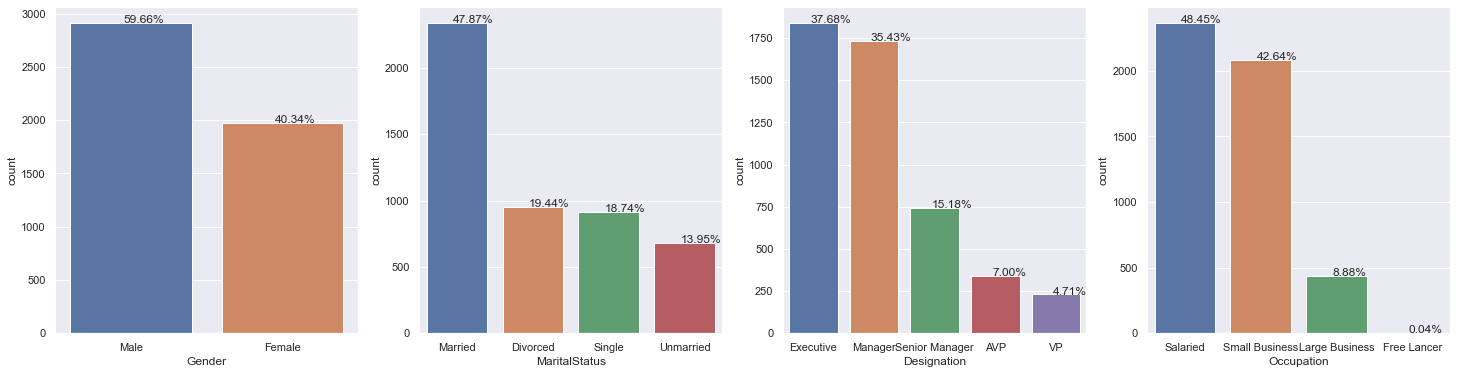

In [54]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 6))
drawCountPlot(df,'Gender',axes[0])
drawCountPlot(df,'MaritalStatus',axes[1])
drawCountPlot(df,'Designation',axes[2])
drawCountPlot(df,'Occupation',axes[3]) 

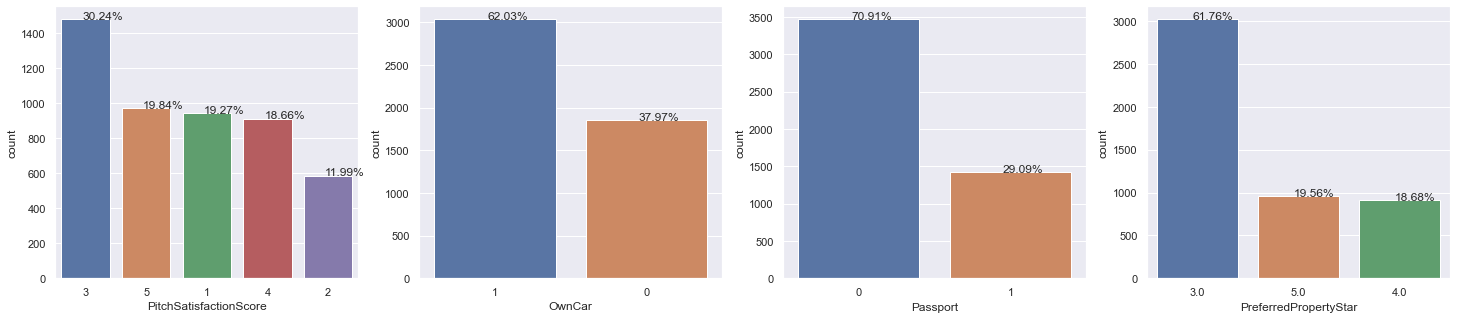

In [55]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCountPlot(df,'PitchSatisfactionScore',axes[0])
drawCountPlot(df,'OwnCar',axes[1])
drawCountPlot(df,'Passport',axes[2])
drawCountPlot(df,'PreferredPropertyStar',axes[3])

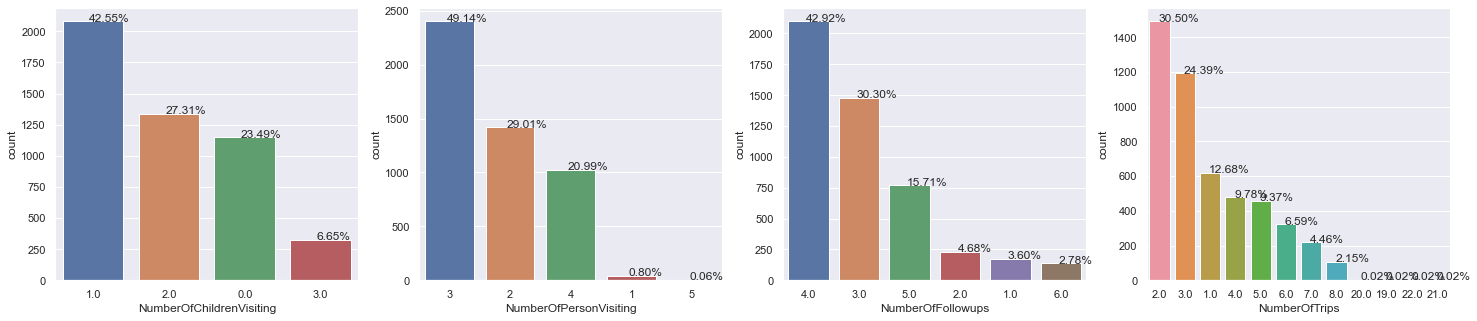

In [56]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCountPlot(df,'NumberOfChildrenVisiting',axes[0])
drawCountPlot(df,'NumberOfPersonVisiting',axes[1])
drawCountPlot(df,'NumberOfFollowups',axes[2])
drawCountPlot(df,'NumberOfTrips',axes[3])

**Observation**
* Only 18.82% customers has taken product
* 70.97% customer self enquired about the product
* Basic - 37.68% and Delux - 35.43% are the two top most products pitched
* 65.21% of customers is from CityTier 1.
* 59.6% customers are male
* 47.87% customers are married and 13.95% cusotmers are unmarried
* 37.68 customers are Executive and 35.43% customers are managers
* 48.45% customers are salaried customers and 0.04% are Free Lancers
* 62.03% customers has Car
* 70.91% Customers has Passport
* 61.76% of customers like 3 star property
* 42.55% of customers visited with 1 child
* 49.14% of customers mostly visited with 2 more person.
* 42.92% of customers needed 4 followups
* 30.50% of customers has made 2 trips 

#### Bivariate & Multivariate Analysis

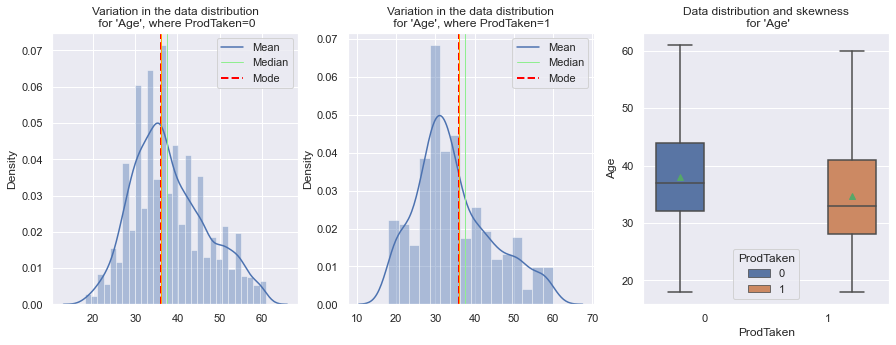

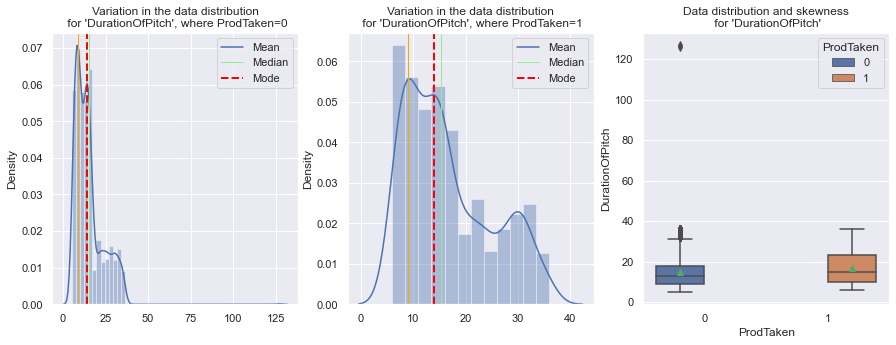

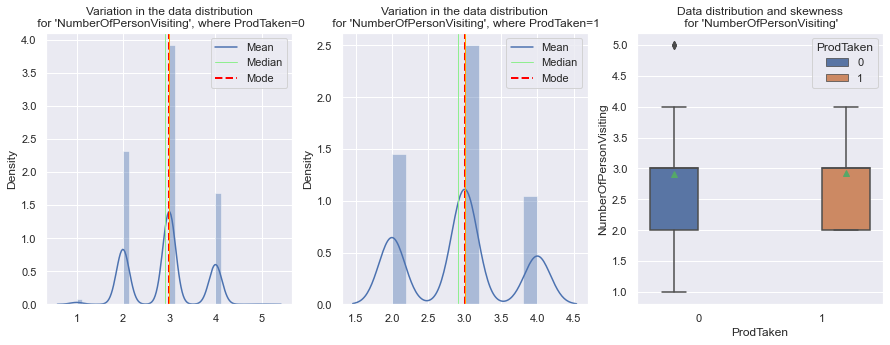

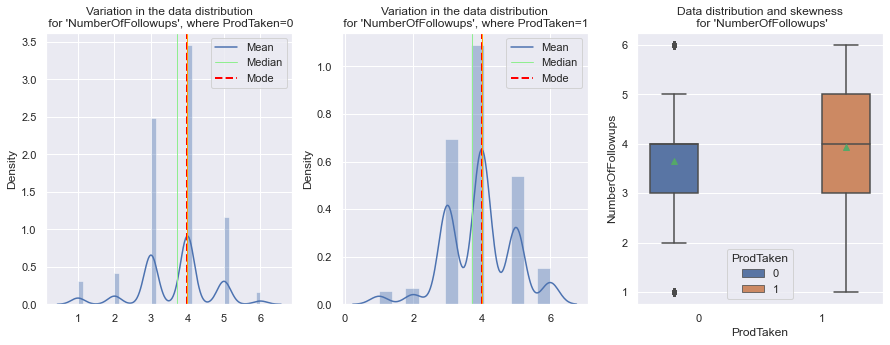

In [57]:
drawBiVariantGraph(df,'Age','ProdTaken')
drawBiVariantGraph(df,'DurationOfPitch','ProdTaken')
drawBiVariantGraph(df,'NumberOfPersonVisiting','ProdTaken')
drawBiVariantGraph(df,'NumberOfFollowups','ProdTaken') 

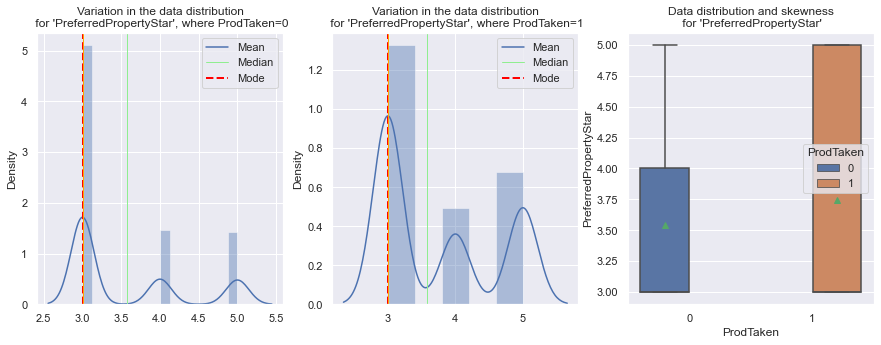

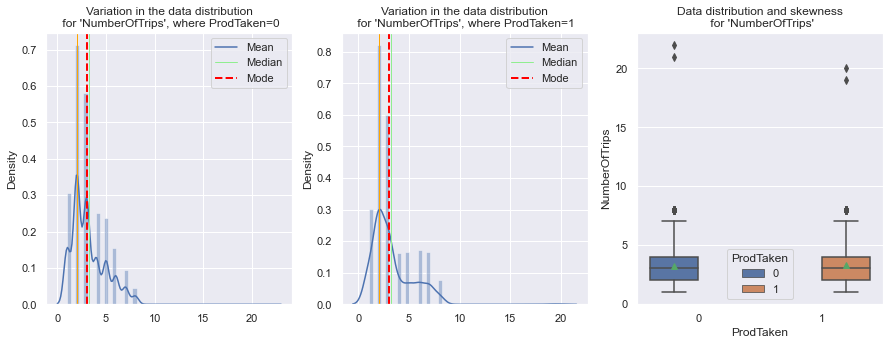

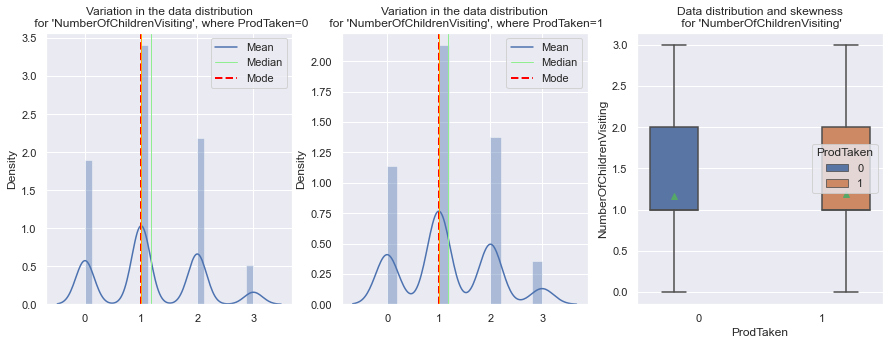

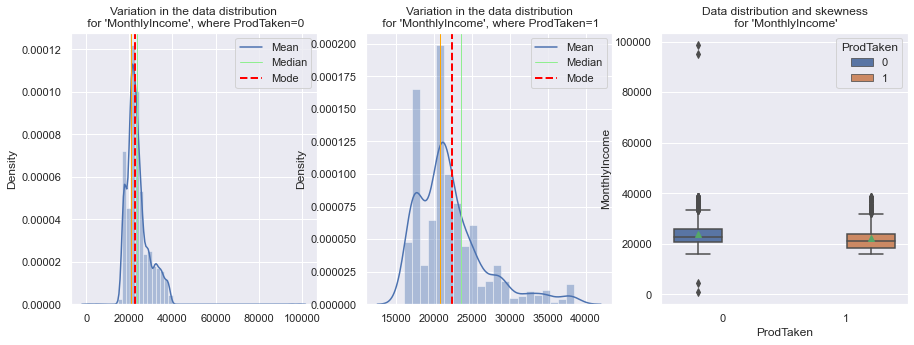

In [58]:
drawBiVariantGraph(df,'PreferredPropertyStar','ProdTaken')
drawBiVariantGraph(df,'NumberOfTrips','ProdTaken')
drawBiVariantGraph(df,'NumberOfChildrenVisiting','ProdTaken')
drawBiVariantGraph(df,'MonthlyIncome','ProdTaken')

**Observation**
* Most of the customers who accepted the product is in age group 28-40.
* DurationOfPitch is in the range of 8-38 for customers who took product
* 2-4 persons visited when customer took the product.
* For most customer who took product has 3-5 follow ups
* Customers who took product prefers property star in range of 3-5, All customers who preferred 4 and above took the product
* Customer who took product has income in range of 20k-25k

### EDA - When customer has taken the product
####  Customer profile (characteristics of a customer) of the different packages

In [59]:
# Extract records where ProdTaken==1
prodTakenDf=df[df['ProdTaken']==1]
prodTakenDf.sample(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4666,1,37.0,Self Enquiry,1,23.0,Salaried,Female,3,2.0,Basic,5.0,Unmarried,3.0,0,1,1,1.0,Executive,21421.0
3052,1,56.0,Self Enquiry,3,9.0,Small Business,Male,3,4.0,Deluxe,3.0,Unmarried,6.0,0,2,0,2.0,Manager,23838.0
2375,1,29.0,Self Enquiry,1,13.0,Large Business,Female,2,3.0,Basic,3.0,Married,4.0,1,4,1,0.0,Executive,31124.0
1610,1,33.0,Self Enquiry,1,15.0,Small Business,Female,2,3.0,Basic,5.0,Single,1.0,0,4,1,0.0,Executive,20761.0
3242,1,34.0,Self Enquiry,1,32.0,Small Business,Male,3,5.0,Basic,4.0,Single,6.0,1,4,0,1.0,Executive,20991.0


#### Create count plot on the basis of different columns

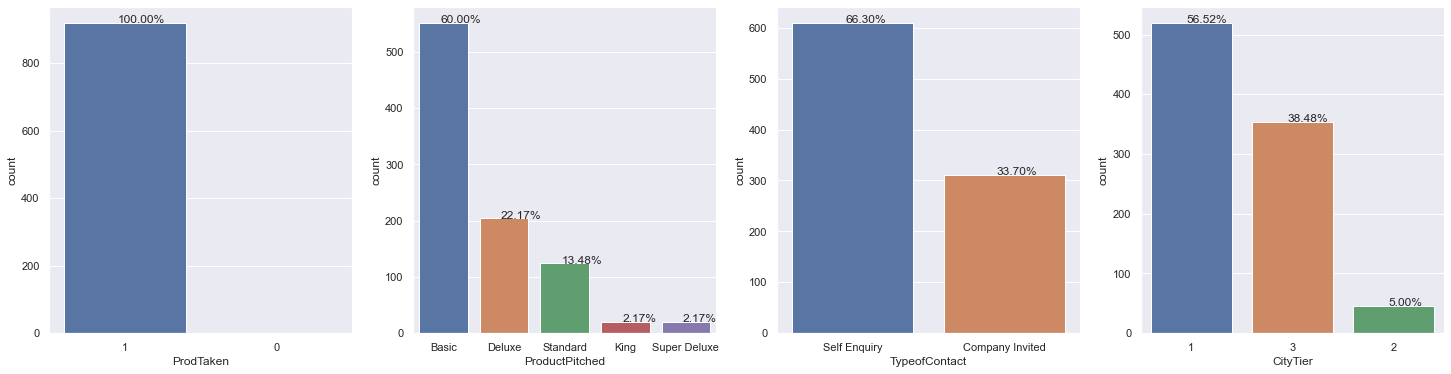

In [60]:
fig, axes = plt.subplots(ncols=4,figsize=(25,6))
drawCountPlot(prodTakenDf,'ProdTaken',axes[0])
drawCountPlot(prodTakenDf,'ProductPitched',axes[1])
drawCountPlot(prodTakenDf,'TypeofContact',axes[2])
drawCountPlot(prodTakenDf,'CityTier',axes[3])

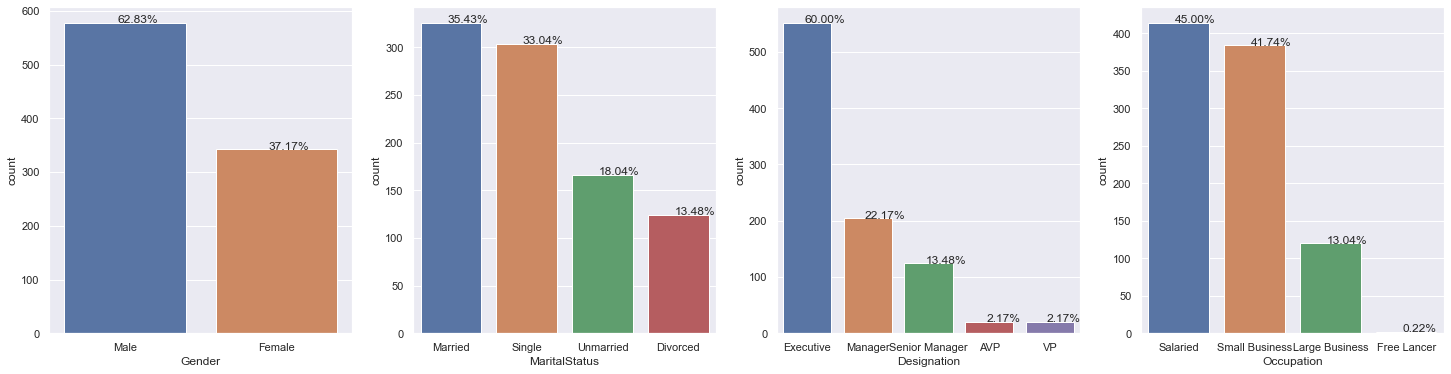

In [61]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 6))
drawCountPlot(prodTakenDf,'Gender',axes[0])
drawCountPlot(prodTakenDf,'MaritalStatus',axes[1])
drawCountPlot(prodTakenDf,'Designation',axes[2])
drawCountPlot(prodTakenDf,'Occupation',axes[3]) 

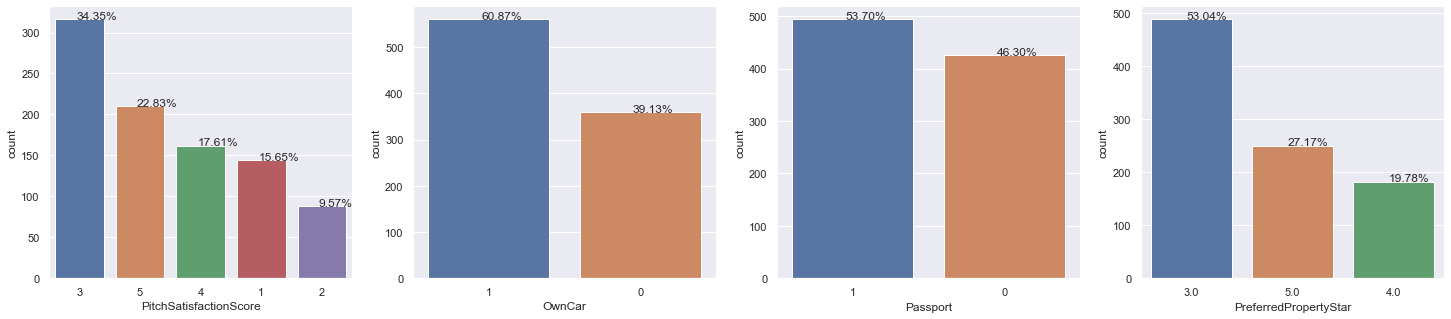

In [62]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCountPlot(prodTakenDf,'PitchSatisfactionScore',axes[0])
drawCountPlot(prodTakenDf,'OwnCar',axes[1])
drawCountPlot(prodTakenDf,'Passport',axes[2])
drawCountPlot(prodTakenDf,'PreferredPropertyStar',axes[3])

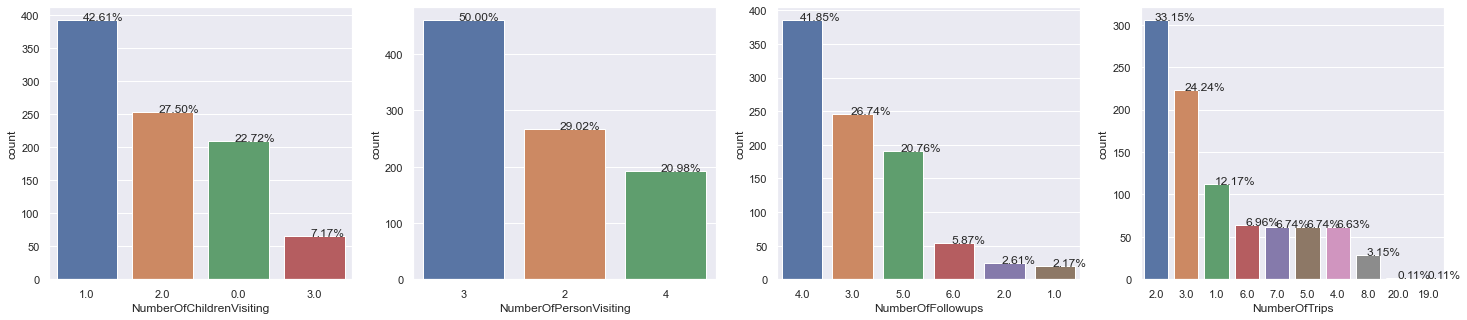

In [63]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCountPlot(prodTakenDf,'NumberOfChildrenVisiting',axes[0])
drawCountPlot(prodTakenDf,'NumberOfPersonVisiting',axes[1])
drawCountPlot(prodTakenDf,'NumberOfFollowups',axes[2])
drawCountPlot(prodTakenDf,'NumberOfTrips',axes[3])

**Observation**
* 60% customers took basic product, 22.17% took Deluxe
* 66.30% product enquiry was Self Enquiry
* 56.52% customers where from CityTier 1 and 38.48% from CityTier3
* 62.83% customers where Male
* 35.43% customers where married and 30.04 were single
* 60% customers where Executive and 22.17% were Managers
* 45% customers were salaried and 41.74 were from Small business
* PitchSatifisfactionScore was 3 for 34.35% customer and 22.83% for rating 5
* 60.87% customers have their own car
* 53.70% customers have passports
* 53.04% customers preferPropertyStar 3 and 27.17% prefers star 5
* 42.61% customers came with 1 children
* 50% customers visited with 3 members
* 4 Followups for 41.85% customers was done and 3 for 26.74% customers
* 33.15% customers have 2 trips and 24.24% have 3 trips

### Create AgeGroup for product analysis on the basis of Age

In [64]:
prodTakenDf['AgeGroup'] = pd.cut(prodTakenDf['Age'], bins = [5, 20, 35, 50, 65], labels = ['5-20','21-35', '36-50', '51-65'])

#### AgeGroup VS ProductPitched

Text(0.5, 1.0, 'Age  vs ProductPitched')

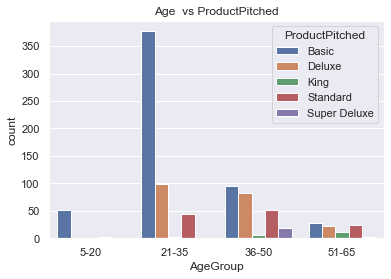

In [65]:
sns.countplot(x='AgeGroup',hue='ProductPitched',data=prodTakenDf).set_title('Age  vs ProductPitched')

**Observation**
* Most customers who took basic Product is in the age group 21-35.
* Standard product is taken by age group 36-50

#### Designation VS ProductPitched

Text(0.5, 1.0, 'Designation  vs ProductPitched')

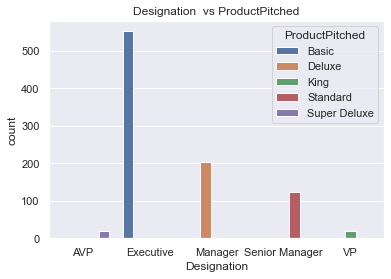

In [66]:
sns.countplot(x='Designation',hue='ProductPitched',data=prodTakenDf).set_title('Designation  vs ProductPitched')

**Observation**
* Basic Product is mostly taken by Executives
* Deluxe Product is taken by Managers
* Senior Managers took Standard
* King was taken by VP.
* AVP took Super Deluxe

#### AgeGroup VS Designation

Text(0.5, 1.0, 'AgeGroup  vs Designation')

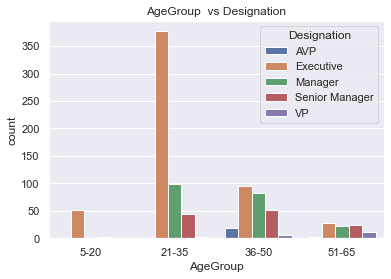

In [67]:
sns.countplot(x='AgeGroup',hue='Designation',data=prodTakenDf).set_title('AgeGroup  vs Designation')

**Observation**
* Most of the Executives is in the age group of 21-35
* Most of the Managers is in the age group of 36-50
* Most VPs is in age group 51-65

#### AgeGroup VS Occupation

Text(0.5, 1.0, 'AgeGroup vs Occupation')

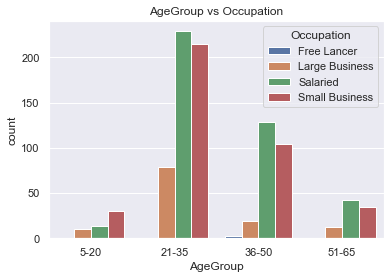

In [68]:
sns.countplot(x='AgeGroup',hue='Occupation',data=prodTakenDf).set_title('AgeGroup vs Occupation')

**Observation**
* Customers of age group is mostly salaried and or from small business

####  Occupation vs ProductPitched

Text(0.5, 1.0, 'Occupation  vs ProductPitched')

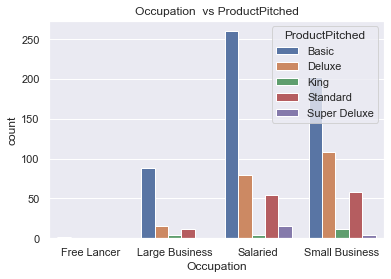

In [69]:
sns.countplot(x='Occupation',hue='ProductPitched',data=prodTakenDf).set_title('Occupation  vs ProductPitched')

**Observation**
* Most Salaried customer were taken Basic & Deluxe Product
* Most standard product was taken by Small Business

Text(0.5, 1.0, 'TypeofContact  vs ProductPitched')

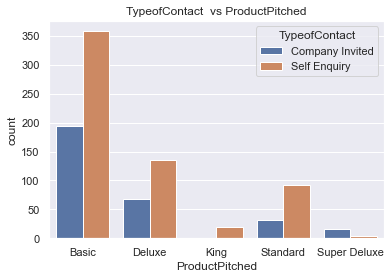

In [70]:
sns.countplot(hue='TypeofContact',x='ProductPitched',data=prodTakenDf).set_title('TypeofContact  vs ProductPitched')

**Observation**
* Most of the customers who took the product was self enquired about the product

### Create MonthlyIncomeGroup for product analysis on the basis of MonthlyIncome

In [71]:
prodTakenDf['MonthlyIncomeGroup'] = pd.cut(prodTakenDf['MonthlyIncome'], bins = [0,20000,40000, 60000,80000,100000], labels = ['0-20000', '20001-40000', '40001-60000', '60001-80000','80001-100000'])

#### MonthlyIncomeGroup VS ProductPitched

Text(0.5, 1.0, 'MonthlyIncomeGroup  vs ProductPitched')

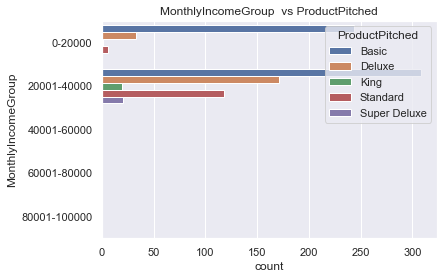

In [72]:
sns.countplot(y='MonthlyIncomeGroup',hue='ProductPitched',data=prodTakenDf).set_title('MonthlyIncomeGroup  vs ProductPitched')

**Observation**
* Almost all the products are bought by the customers whose MonthlyIncome is less than equal to 40000.

#### MonthlyIncomeGroup VS AgeGroup

Text(0.5, 1.0, 'AgeGroup  vs MonthlyIncomeGroup')

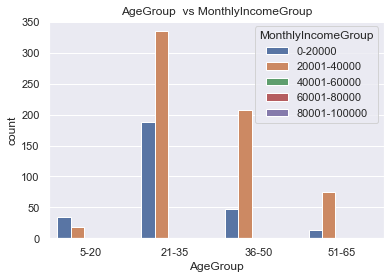

In [73]:
sns.countplot(x='AgeGroup',hue='MonthlyIncomeGroup',data=prodTakenDf).set_title('AgeGroup  vs MonthlyIncomeGroup')

**Observation**
* Most customers income is in the range of 20001-40000 and most of them is in age group 21-35
* 21-35 age group has most slary in group 20001-40000 and then followed by 0-20000

### EDA Observation - Customer Profiles who took the product
#### Baisc
* Age Group: 21-35, 
* Designation: Executive
* Occupation: Salaried
* ContactType: Self Enquired
* MonthlyIncome 0-40000

#### Deluxe
* Age Group: 21-50, 
* Designation: Manager
* Occupation: Small Business
* ContactType: Self Enquired
* MonthlyIncome 20001-40000

#### King
* Age Group: 51-65, 
* Designation: VP
* Occupation: Small Business
* ContactType: Self Enquired
* MonthlyIncome 20001-40000

#### King
* Age Group: 51-65, 
* Designation: VP
* Occupation: Small Business
* ContactType: Self Enquired
* MonthlyIncome 20001-40000

#### Standard
* Age Group: 21-50, 
* Designation: Senior Manager
* Occupation: Small Business
* ContactType: Self Enquired
* MonthlyIncome 20001-40000

#### Standard
* Age Group: 36-50, 
* Designation: AVP
* Occupation: Small Business
* ContactType: Company Invited
* MonthlyIncome 20001-40000


### Relationship between different fields

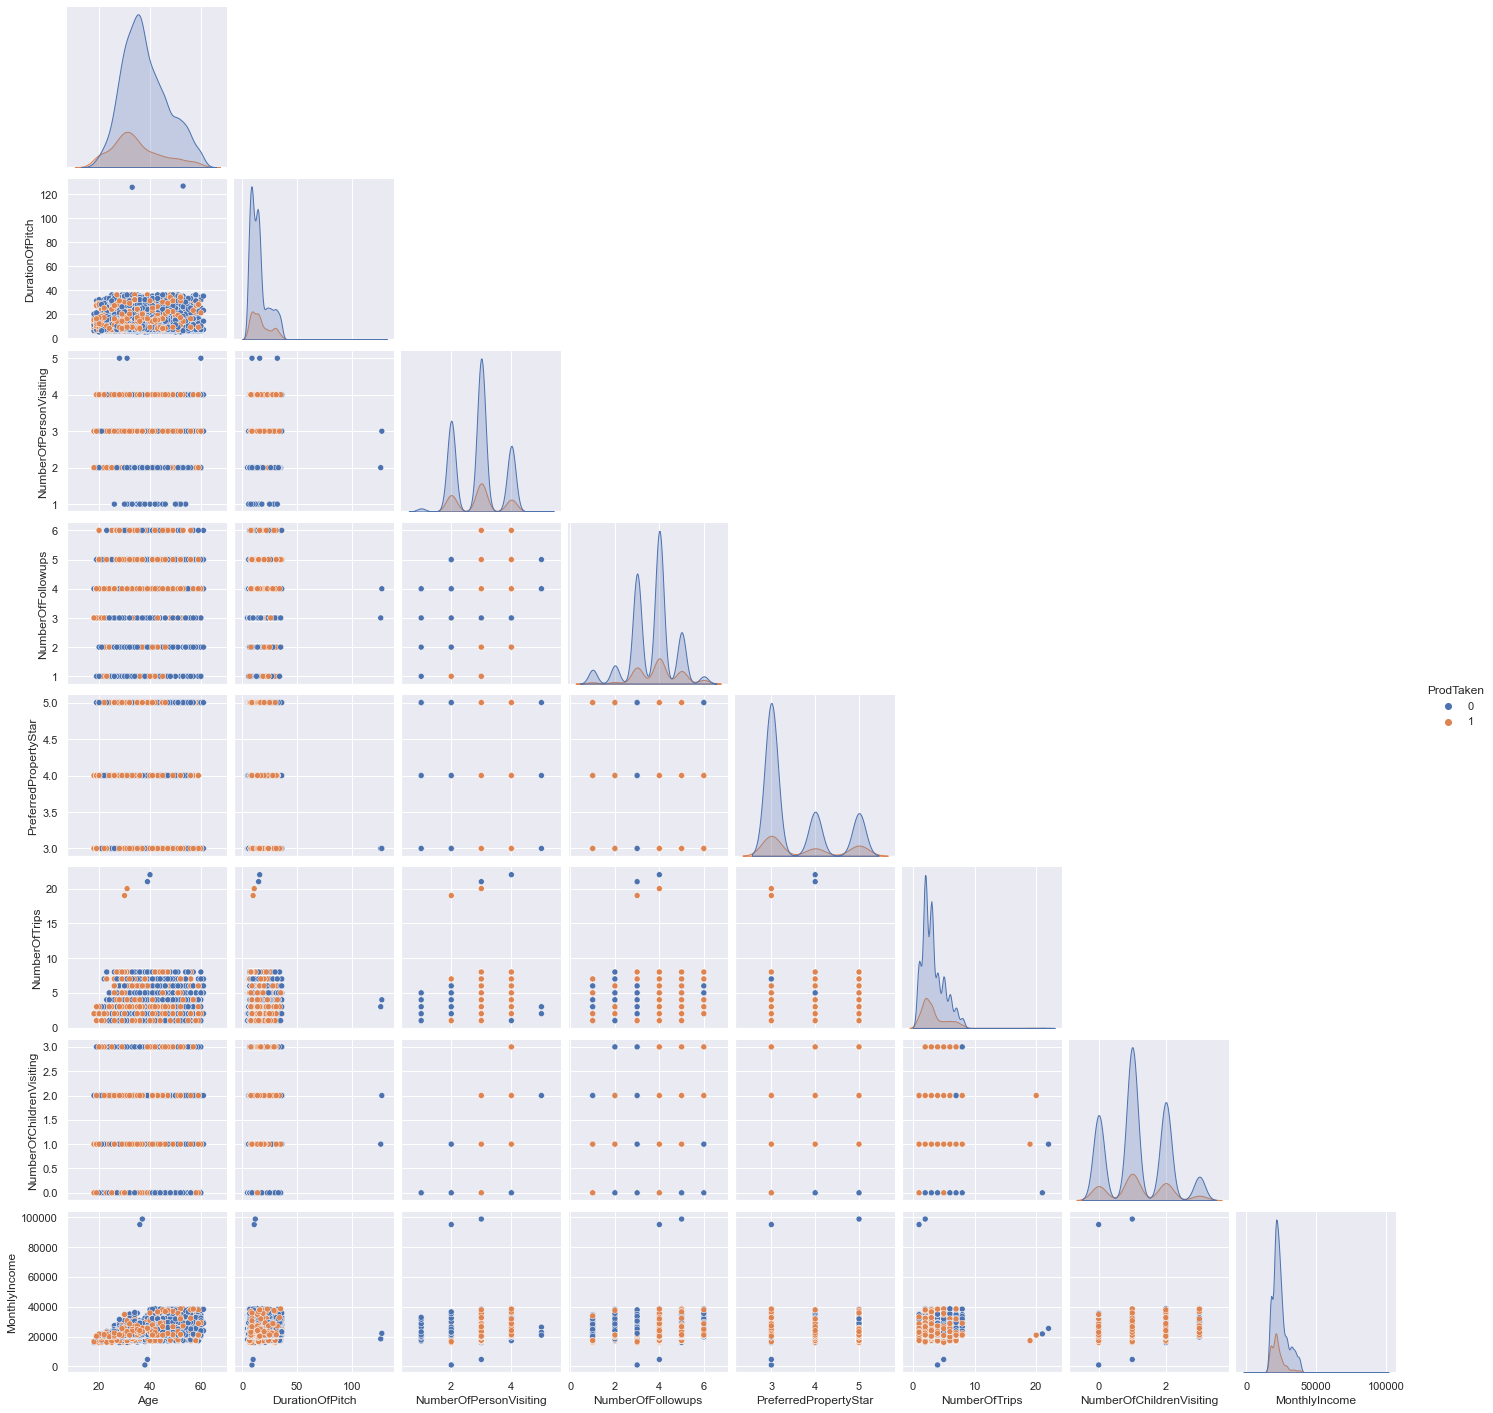

In [74]:
sns.pairplot(df, hue="ProdTaken",corner=True)

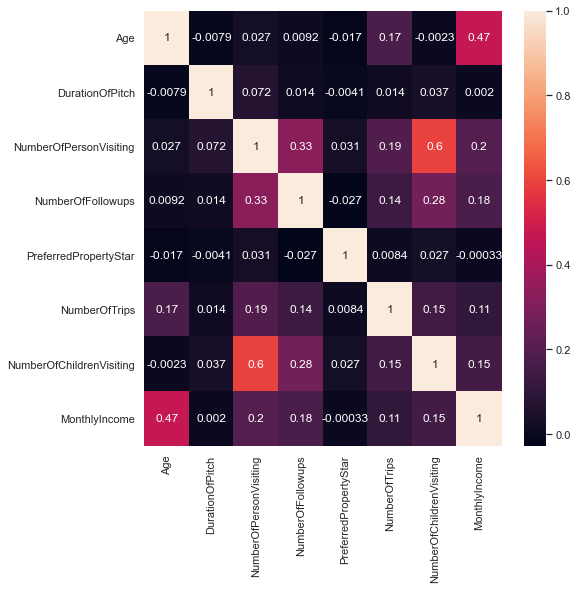

In [75]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observation**
* There is negative correlation of -0.0079 between Age and Duration of Pitch 
* There is negative correlation of -0.017 between Age and Preferred Properry Star
* There is negative correlation of -0.0023 between Age and NumberOfChildrenVisiting
* There is negative correlation of -0.0041 between Duration of Pitch and Preferred Properry Star
* There is negative correlation of -0.027 between NumberOfFollowups and Preferred Properry Star
* A positive corrlection of 0.6 bewteen NumberOfChildrenVisiting and NumberOfPersonVisting
* A positive corrlection of 0.28 bewteen NumberOfFollowups and NumberOfChildrenVisiting
* A positive corrlection of 0.37 bewteen NumberOfChildrenVisiting and Duration of Pitch 
* A positive corrlection of 0.47 bewteen Age and Monthly Income

## Model Building

In [76]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

# Encode catagorical vairables in a data frame using pd.get_dummies(...)
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


## Handles outlier values
def outlierHandling(df,columnName):
    Q1=df[columnName].quantile(0.25) # 25th quantile
    Q3=df[columnName].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    lowerWhisker = Q1 - 1.5*IQR 
    upperWhisker = Q3 + 1.5*IQR
    
    # Assign lowerWhisker value to all the values lower than it
    # Assign upperWhisker value to all the values larger than it
    df[columnName] = np.clip(df[columnName], lowerWhisker, upperWhisker)
    return df

### Outlier Treatment

In [77]:
#Copy the data frame 
dfWithOutlierHandled=df.copy()

In [78]:
outlierHandling(dfWithOutlierHandled,'DurationOfPitch');
outlierHandling(dfWithOutlierHandled,'NumberOfPersonVisiting');
outlierHandling(dfWithOutlierHandled,'NumberOfFollowups');
outlierHandling(dfWithOutlierHandled,'NumberOfTrips');
outlierHandling(dfWithOutlierHandled,'MonthlyIncome');

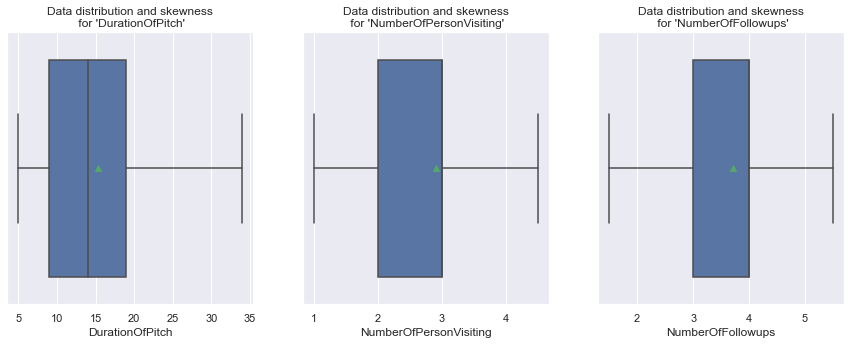

In [79]:
fig, axes = plt.subplots(ncols=3,figsize=(15, 5))
drawBoxPlot(dfWithOutlierHandled,'DurationOfPitch',axes[0])
drawBoxPlot(dfWithOutlierHandled,'NumberOfPersonVisiting',axes[1])
drawBoxPlot(dfWithOutlierHandled,'NumberOfFollowups',axes[2])

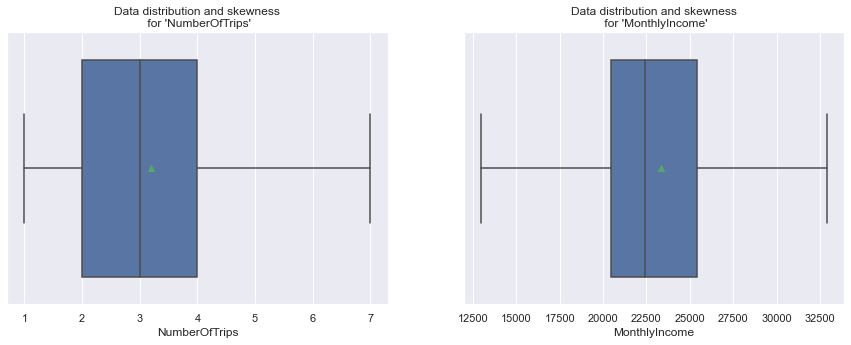

In [80]:
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
drawBoxPlot(dfWithOutlierHandled,'NumberOfTrips',axes[0])
drawBoxPlot(dfWithOutlierHandled,'MonthlyIncome',axes[1])

### Data Preparation

#### Creating training and test sets.

In [81]:
# Separating target column

#For new propsect customers - fields - 'PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch' will not be present - since the product is not yet pitched, hence dropping these before making model 
X = df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
y = df['ProdTaken']

In [82]:
#Creating dummies for categorical fields
X = pd.get_dummies(X,drop_first=True)

#### Spliting data into training and test set

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 22) (1467, 22)


In [84]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3421
Number of rows in test data = 1467


#### The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.

In [85]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


## Building the model

### Model can make wrong predictions as:
* Predicting a customer/tourist will take the pitched product but they actually doesn't take
* Predicting a customer/tourist will not take the product if pitched but actually they will take

### Which case is more important?
* A loss of opportunity (ie. second case) - company failed to make a customer take the product due to wrong prediction which we want to minimize (loss of opportunity). The whole purpose of this investigatation is to make sure we can avoid opportunities and increase product acceptance.

### How to reduce this loss i.e need to reduce False Negatives?
* recall should be maximized, the greater the recall lesser the chances of false negatives

### Utitlity methods

In [86]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    
def drawDecisionTree(model,feature_names):
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)

### Model building - Bagging

#### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.867076  0.623188   0.653992  0.638219


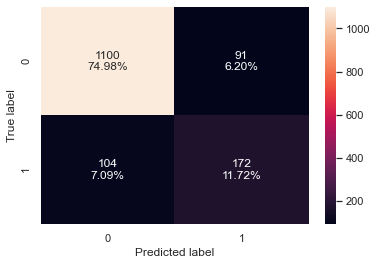

In [87]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1, class_weight={0:0.19, 1:0.81})
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

##### Visualizing Decision Tree

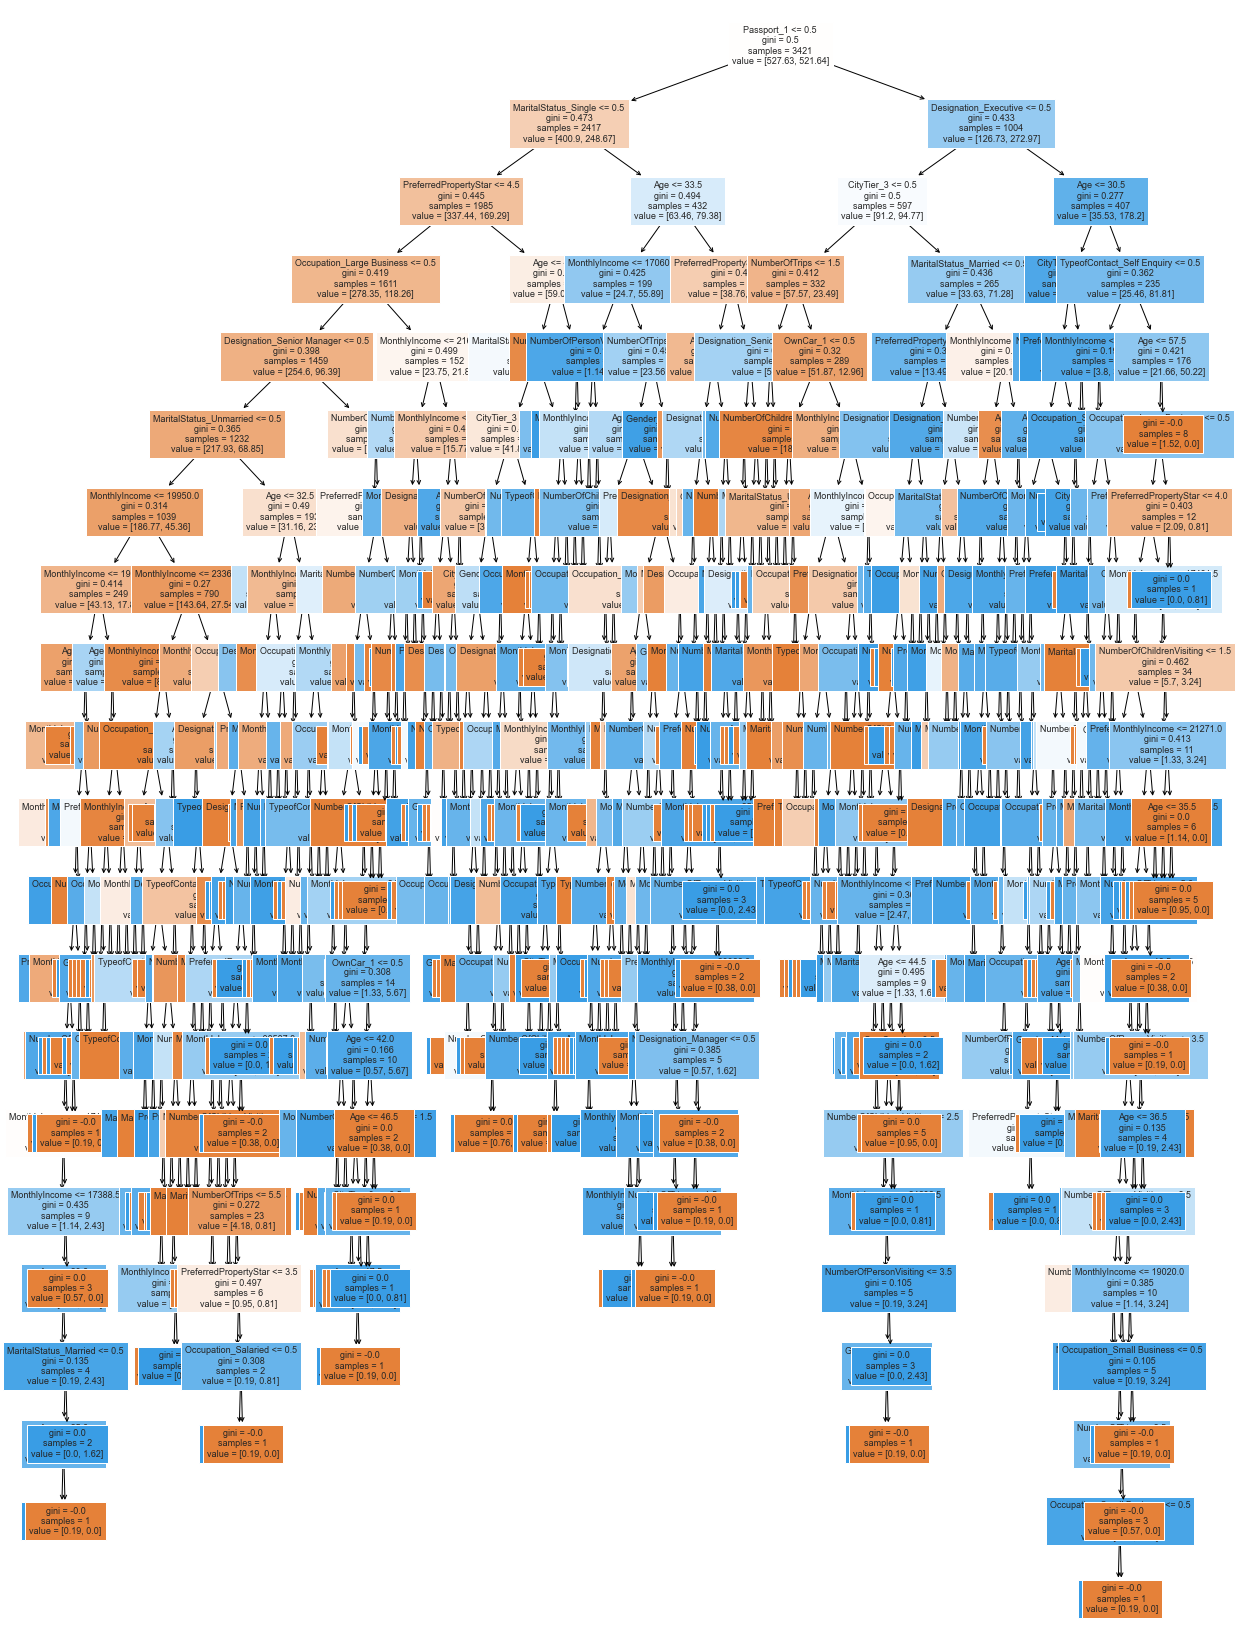

In [88]:
## creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(20, 30))
drawDecisionTree(d_tree,feature_names)
plt.show()

In [89]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        d_tree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
MonthlyIncome               2.109526e-01
Age                         1.957854e-01
Passport_1                  8.496388e-02
NumberOfTrips               7.782149e-02
Designation_Executive       6.429179e-02
PreferredPropertyStar       5.260159e-02
CityTier_3                  4.250637e-02
NumberOfChildrenVisiting    3.125517e-02
MaritalStatus_Single        2.486389e-02
MaritalStatus_Unmarried     2.482448e-02
NumberOfPersonVisiting      2.385576e-02
Gender_Male                 2.277214e-02
CityTier_2                  2.258718e-02
Occupation_Small Business   1.786705e-02
TypeofContact_Self Enquiry  1.698579e-02
Designation_Senior Manager  1.692436e-02
Occupation_Large Business   1.528916e-02
Occupation_Salaried         1.489792e-02
OwnCar_1                    1.398622e-02
MaritalStatus_Married       1.336194e-02
Designation_Manager         1.160586e-02
Designation_VP              2.557277e-17


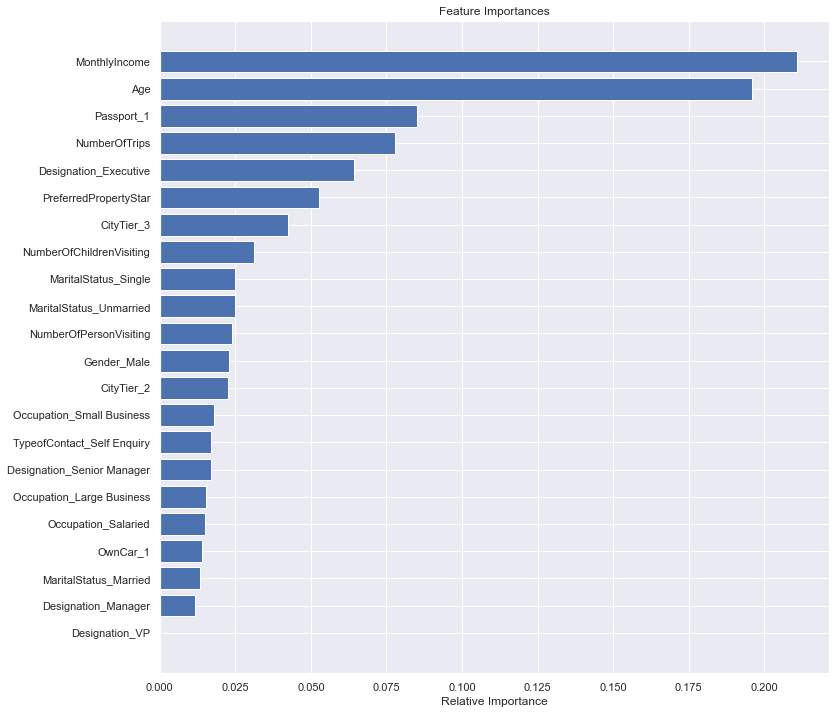

In [90]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Decision tree model is overfitted with the training data, there is lots of difference on stats between training and test data.
* Recall of this model is less (0.62) and Precision (0.65)
* Most important features are MonthlyIncome, Age and Passport.

#### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.895024  0.496377   0.901316  0.640187


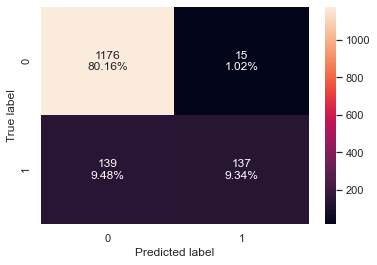

In [91]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [92]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
MonthlyIncome               0.176493
Age                         0.167426
NumberOfTrips               0.089977
Passport_1                  0.075400
PreferredPropertyStar       0.054082
NumberOfChildrenVisiting    0.047692
NumberOfPersonVisiting      0.040646
CityTier_3                  0.036312
Gender_Male                 0.033950
TypeofContact_Self Enquiry  0.033269
Designation_Executive       0.032962
MaritalStatus_Single        0.031829
OwnCar_1                    0.030344
Occupation_Small Business   0.022382
MaritalStatus_Married       0.021870
Occupation_Salaried         0.021559
MaritalStatus_Unmarried     0.020926
Designation_Manager         0.017755
Occupation_Large Business   0.017099
Designation_Senior Manager  0.012314
CityTier_2                  0.011457
Designation_VP              0.004257


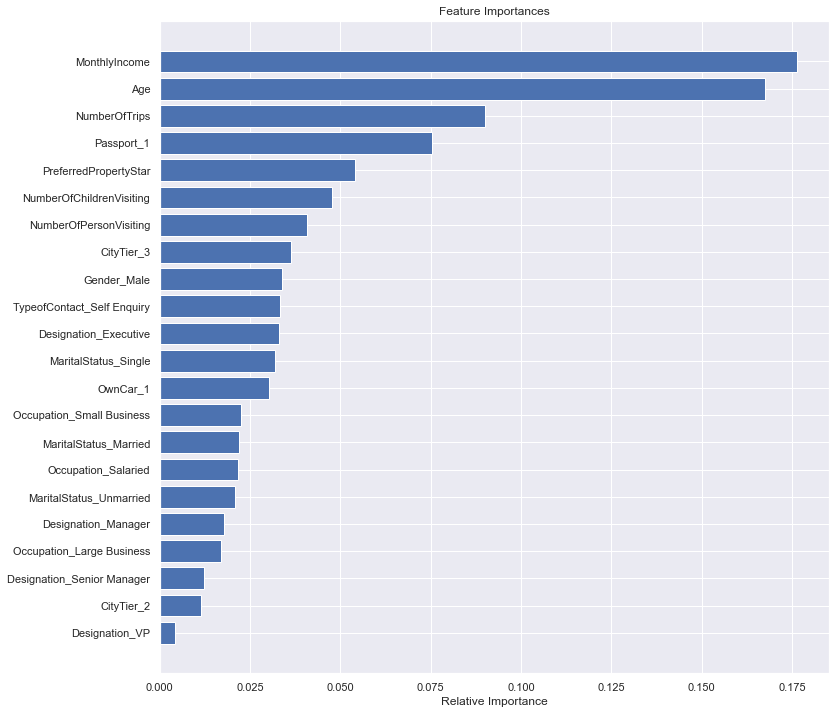

In [93]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* This Random Forest model is overfitted with the training data, there is lots of difference on stats (Recall, F1, Accuracy, etc) score between training and test data.
* This model recall on the test data is very less (0.49)
* Most important features are MonthlyIncome, Age, NumberOfTrips and Passport.

#### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.991231  0.956522   0.996764  0.976228
   Accuracy    Recall  Precision        F1
0  0.894342  0.543478   0.837989  0.659341


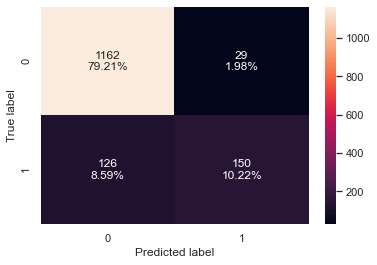

In [94]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

**Observation**
* This Bagging Classifier model is overfitted with the training data, there is lots of difference on stats (Recall, F1, Accuracy, etc) score between training and test data.
* This model recall on the test data is very less (0.54 only)

### Model performance improvement (Hyperparameter Tuning)  - Bagging

### Decision Tree

In [95]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19, 1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'max_leaf_nodes' : [5,7,10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.742181  0.690994   0.394504  0.502257
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.742331  0.713768   0.397177  0.510363


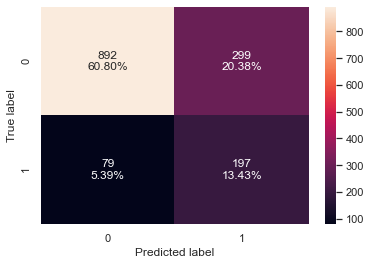

In [96]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

In [97]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Passport_1                  0.329736
Designation_Executive       0.154605
CityTier_3                  0.102721
Age                         0.085434
MaritalStatus_Single        0.080990
NumberOfTrips               0.061951
MaritalStatus_Married       0.038810
MaritalStatus_Unmarried     0.035965
PreferredPropertyStar       0.034812
Designation_Senior Manager  0.027676
Occupation_Large Business   0.025046
MonthlyIncome               0.022254
Designation_Manager         0.000000
OwnCar_1                    0.000000
Occupation_Small Business   0.000000
Gender_Male                 0.000000
NumberOfPersonVisiting      0.000000
Occupation_Salaried         0.000000
CityTier_2                  0.000000
TypeofContact_Self Enquiry  0.000000
NumberOfChildrenVisiting    0.000000
Designation_VP              0.000000


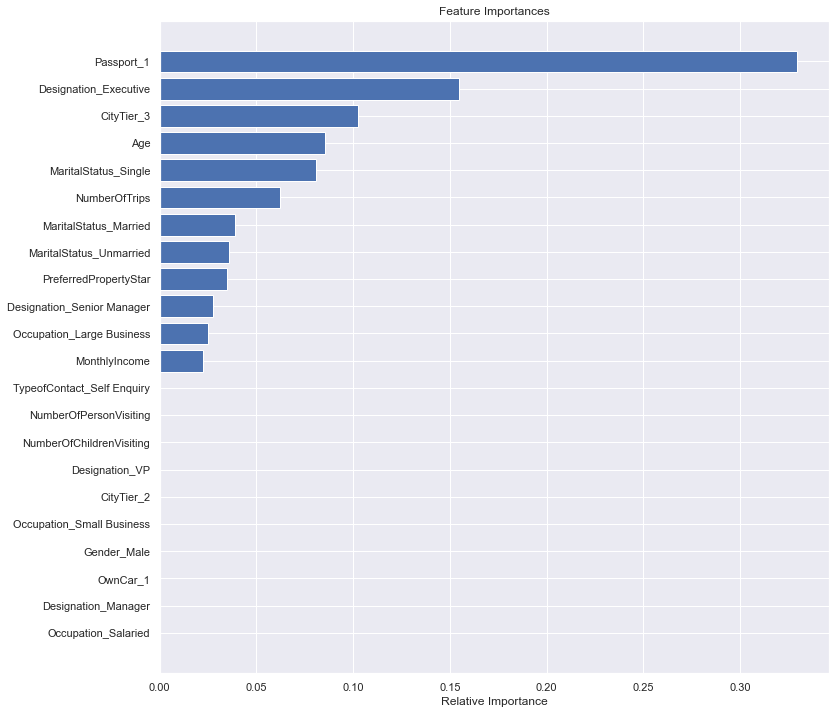

In [98]:
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Visualizing Decision Tree

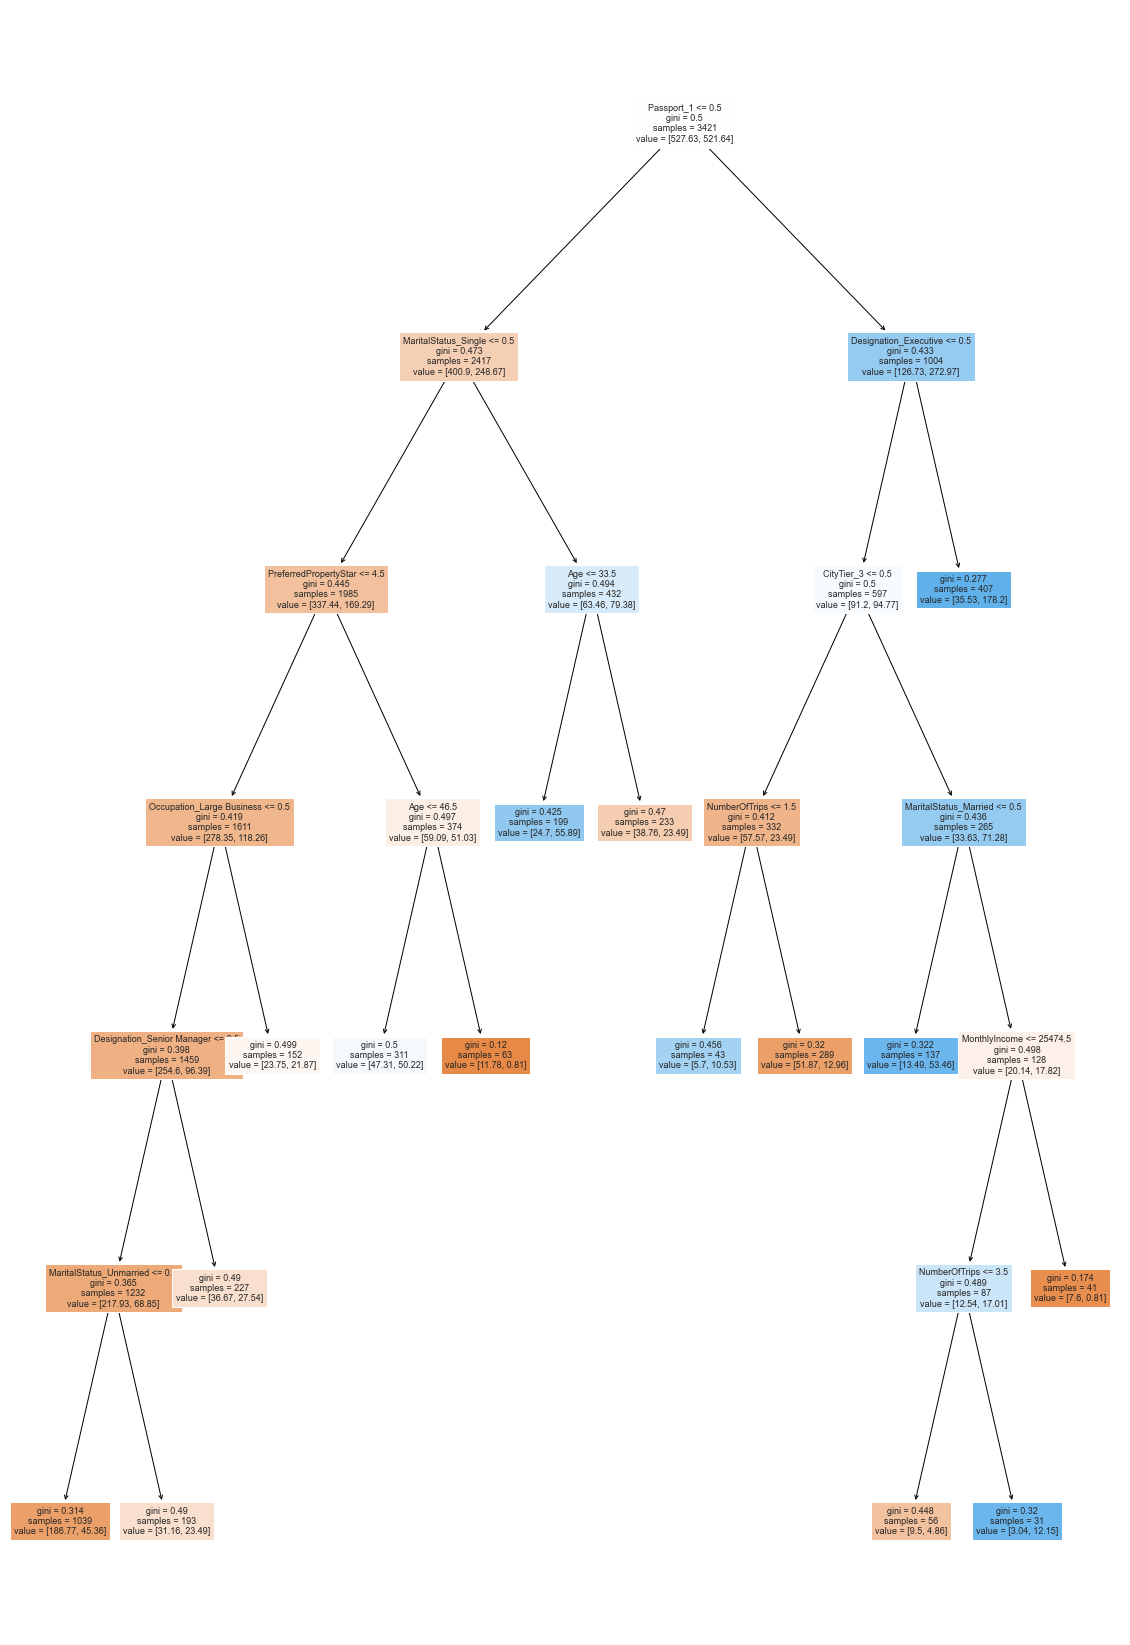

In [99]:
## creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(20, 30))
drawDecisionTree(dtree_estimator,feature_names)
plt.show()

**Observation**
* Model is perform on an average good on both training and test data. Its performance is same for both
* Recall of this model is increased slightly to 0.71 on test data from 0.69 on training data
* Most important features are Passport, Designation_Executive, City_tier3 and Age.

### Random Forest

In [100]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1)

parameters = {  
                'max_depth': [5,8,12,15],
                'max_features': ['auto'],
                'min_samples_leaf': np.arange(5, 10),
                'n_estimators': [50,150,200,250,300],
                "max_samples": np.arange(0.3,0.5, 0.7)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=5,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=50,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.815843  0.636646   0.508685  0.565517
Testing performance:
    Accuracy   Recall  Precision       F1
0  0.823449  0.65942   0.524496  0.58427


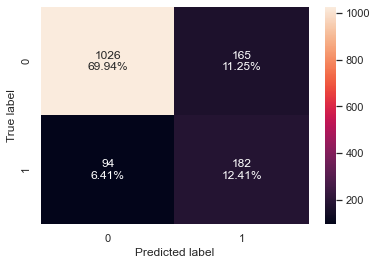

In [101]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [102]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Passport_1                  0.202843
MonthlyIncome               0.136490
Age                         0.114095
Designation_Executive       0.093196
MaritalStatus_Single        0.076060
CityTier_3                  0.055116
Designation_Manager         0.047278
NumberOfTrips               0.044843
PreferredPropertyStar       0.042127
MaritalStatus_Married       0.031264
TypeofContact_Self Enquiry  0.018781
NumberOfChildrenVisiting    0.017404
Occupation_Large Business   0.016616
Designation_Senior Manager  0.016420
Occupation_Salaried         0.015479
MaritalStatus_Unmarried     0.015405
NumberOfPersonVisiting      0.014775
OwnCar_1                    0.013986
Gender_Male                 0.011659
Occupation_Small Business   0.008072
Designation_VP              0.004166
CityTier_2                  0.003926


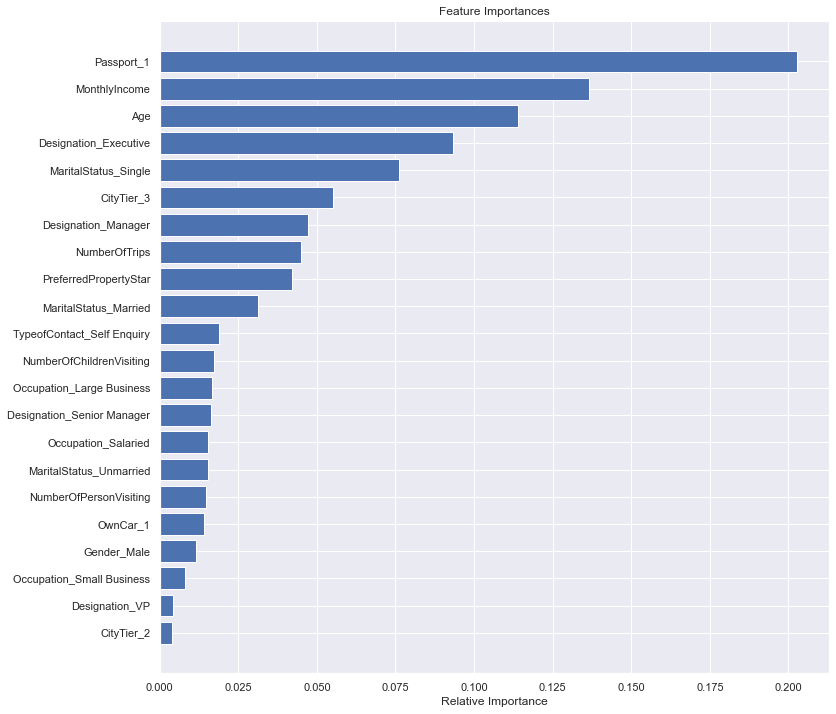

In [103]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Model is perform on an average good on both training and test data. Its performance is same for both set of data
* Recall of this model is increased slightly to 0.63 on test data from 0.65 on training data
* Most important features are Passport, MonthlyIncome, Age, Designation_Executive and MartialStatus_Single.

### Bagging Classifier

In [104]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.6,0.7,0.8,0.9,1], 
              'max_features': [0.6,0.7,0.8,0.9,1],
              'n_estimators' : [20,40,50,100,150,200],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=1, max_samples=0.8, n_estimators=100,
                  random_state=1)

   Accuracy   Recall  Precision        F1
0  0.899152  0.81677   0.698539  0.753042
   Accuracy   Recall  Precision        F1
0  0.802999  0.59058   0.480826  0.530081


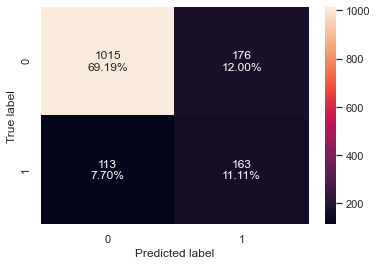

In [105]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

**Observation**
* Tuned Bagging Classifier is perform on an bad on test data. Model is overfitted
* Recall of this model is decreased from 0.81 on training data to 0.59 on test data

## Model building - Boosting

### AdaBoost Classifier

   Accuracy   Recall  Precision        F1
0  0.844198  0.27795   0.724696  0.401796
   Accuracy    Recall  Precision        F1
0  0.839809  0.275362   0.684685  0.392765


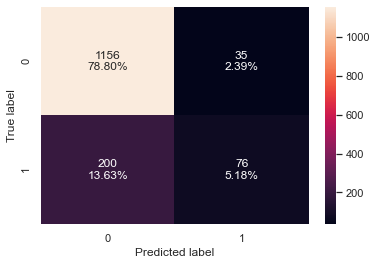

In [106]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [107]:
# The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        ab_classifier.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
MonthlyIncome               0.52
Age                         0.16
NumberOfTrips               0.04
Passport_1                  0.04
PreferredPropertyStar       0.04
Designation_Senior Manager  0.02
TypeofContact_Self Enquiry  0.02
CityTier_2                  0.02
Occupation_Large Business   0.02
NumberOfPersonVisiting      0.02
Gender_Male                 0.02
Designation_Executive       0.02
MaritalStatus_Single        0.02
MaritalStatus_Unmarried     0.02
CityTier_3                  0.02
OwnCar_1                    0.00
Designation_Manager         0.00
Occupation_Small Business   0.00
MaritalStatus_Married       0.00
Occupation_Salaried         0.00
NumberOfChildrenVisiting    0.00
Designation_VP              0.00


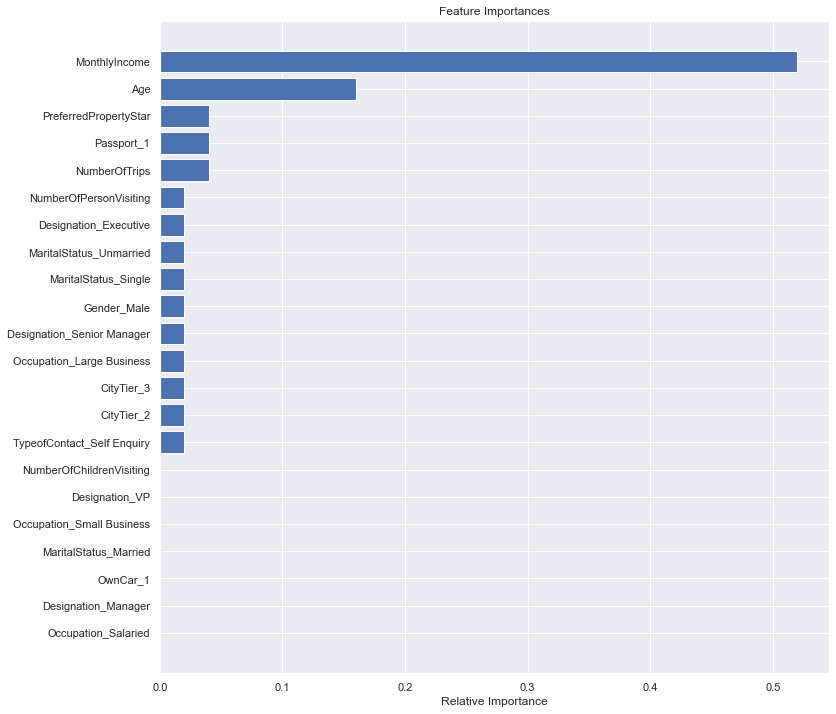

In [108]:
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Model is performing equally on both training and test data
* Recall of this model is very less 0.27
* Most important feature is MonthlyIncome and Age

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.880152  0.431677   0.863354  0.575569
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.860259  0.365942   0.770992  0.496314


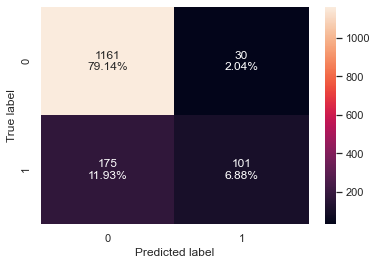

In [109]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [110]:
# The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        gb_classifier.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Passport_1                  0.167066
MonthlyIncome               0.165222
Age                         0.151287
Designation_Executive       0.138481
CityTier_3                  0.069368
MaritalStatus_Single        0.062197
NumberOfTrips               0.057369
PreferredPropertyStar       0.036887
MaritalStatus_Unmarried     0.031039
Designation_Senior Manager  0.023146
Designation_Manager         0.021707
CityTier_2                  0.016696
TypeofContact_Self Enquiry  0.014393
Occupation_Large Business   0.012493
MaritalStatus_Married       0.007471
Gender_Male                 0.006863
OwnCar_1                    0.005145
NumberOfPersonVisiting      0.004924
Occupation_Salaried         0.003556
Occupation_Small Business   0.002272
NumberOfChildrenVisiting    0.001969
Designation_VP              0.000447


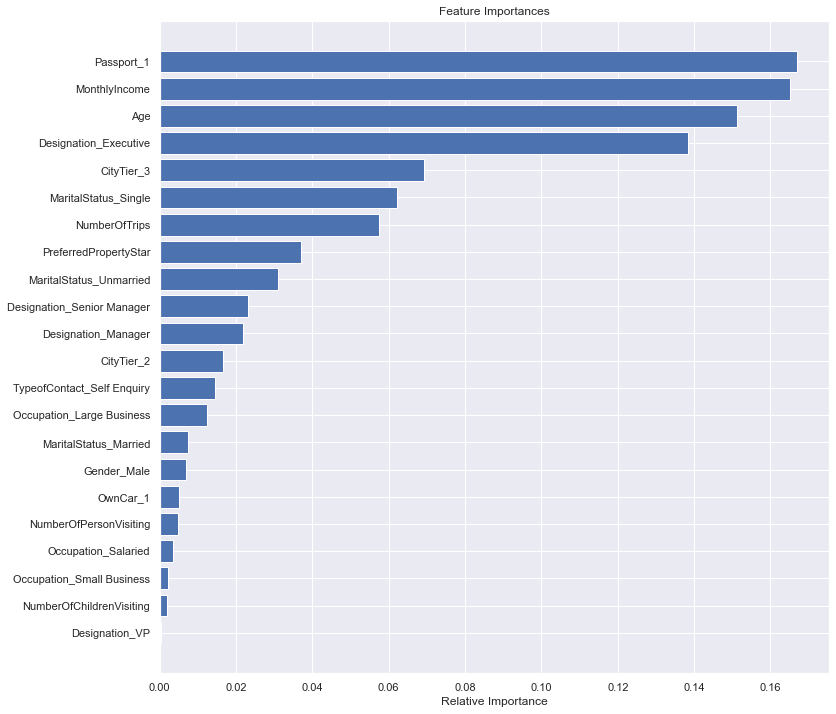

In [111]:
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Model is performing equally on both training and test data
* Recall of this model is decreased on test data. Overall recall for this model is very less.
* Most important features are Passport, MonthlyIncome, Age, Desgination_Executive and CityTier_3

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996785  0.982919        1.0  0.991386
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.903204  0.630435   0.813084  0.710204


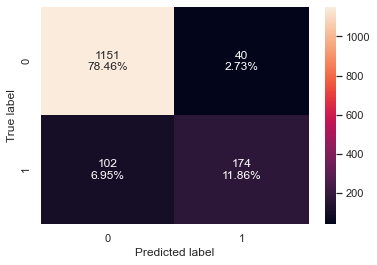

In [112]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [113]:
# The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        xgb_classifier.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Designation_Executive       0.159288
Passport_1                  0.097580
CityTier_3                  0.066051
Designation_Manager         0.054045
MaritalStatus_Single        0.052788
Occupation_Large Business   0.050813
MaritalStatus_Unmarried     0.048601
TypeofContact_Self Enquiry  0.041056
PreferredPropertyStar       0.040909
Designation_Senior Manager  0.038204
CityTier_2                  0.037691
MaritalStatus_Married       0.037192
NumberOfTrips               0.036536
Age                         0.034278
Occupation_Small Business   0.030475
Occupation_Salaried         0.029231
MonthlyIncome               0.028382
NumberOfPersonVisiting      0.027513
Gender_Male                 0.026742
NumberOfChildrenVisiting    0.025512
OwnCar_1                    0.023436
Designation_VP              0.013677


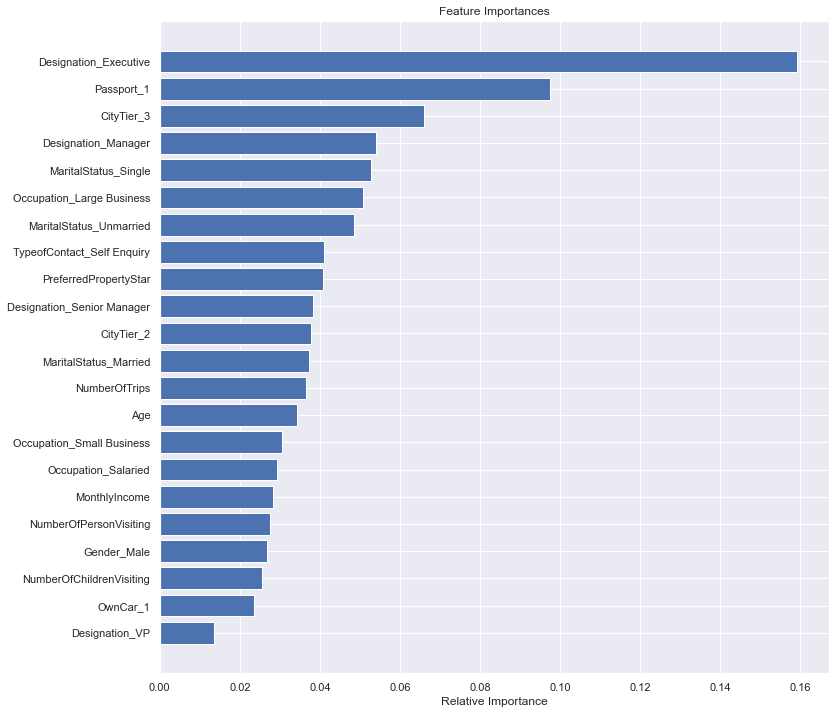

In [114]:
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Model is overfitted on the training data as the Recall, Precision and F1 score decreased significantly on test data.
* Recall of this model is decreased on test data.
* Most Important features are Designation_Executive, Passport, CityTier_3, Desingation_manager

## Model performance improvement (Hyperparameter Tuning) - Boosting

### AdaBoostClassifier

In [115]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,150,30),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=130, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.985969  0.947205   0.977564  0.962145
   Accuracy    Recall  Precision        F1
0  0.871847  0.557971        0.7  0.620968


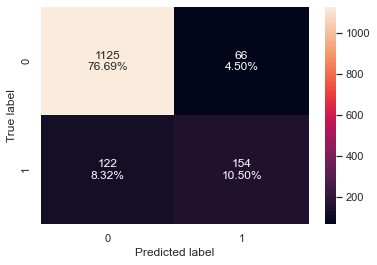

In [116]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [117]:
# The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        abc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
MonthlyIncome               0.446433
Age                         0.162888
NumberOfTrips               0.063447
PreferredPropertyStar       0.035305
Passport_1                  0.029304
Gender_Male                 0.029061
CityTier_3                  0.026110
TypeofContact_Self Enquiry  0.022794
Designation_Executive       0.021306
OwnCar_1                    0.018859
MaritalStatus_Single        0.018758
NumberOfPersonVisiting      0.018331
Designation_Manager         0.016924
MaritalStatus_Unmarried     0.016785
NumberOfChildrenVisiting    0.014299
Occupation_Large Business   0.012687
Occupation_Salaried         0.009633
Designation_Senior Manager  0.008925
CityTier_2                  0.008506
Designation_VP              0.006726
Occupation_Small Business   0.006669
MaritalStatus_Married       0.006250


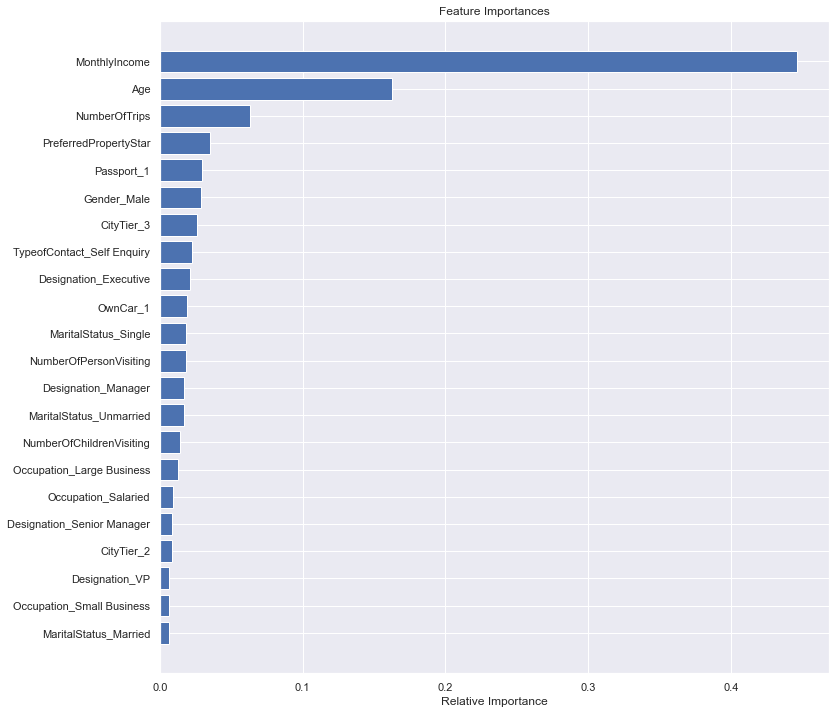

In [118]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* MonthlyIncome and Age are the most important feature for this model
* Model not performing well on test data, recall decreased significantly on test data

### Gradient Boosting Classifier

In [119]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.909968  0.572981    0.91791  0.705545
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.877982  0.474638   0.793939  0.594104


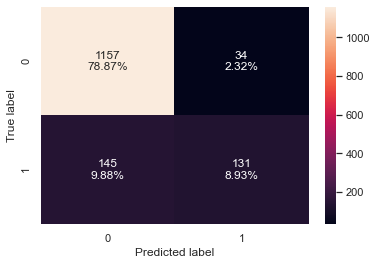

In [120]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [121]:
# The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
MonthlyIncome               0.247051
Age                         0.152352
Passport_1                  0.127946
Designation_Executive       0.098486
NumberOfTrips               0.061939
MaritalStatus_Single        0.058939
CityTier_3                  0.052664
PreferredPropertyStar       0.041338
MaritalStatus_Unmarried     0.025546
CityTier_2                  0.017268
Designation_Manager         0.017221
Occupation_Large Business   0.015524
Designation_Senior Manager  0.015239
TypeofContact_Self Enquiry  0.013459
Gender_Male                 0.011134
NumberOfChildrenVisiting    0.009530
NumberOfPersonVisiting      0.009525
MaritalStatus_Married       0.008156
Occupation_Small Business   0.006909
Occupation_Salaried         0.004807
OwnCar_1                    0.004396
Designation_VP              0.000572


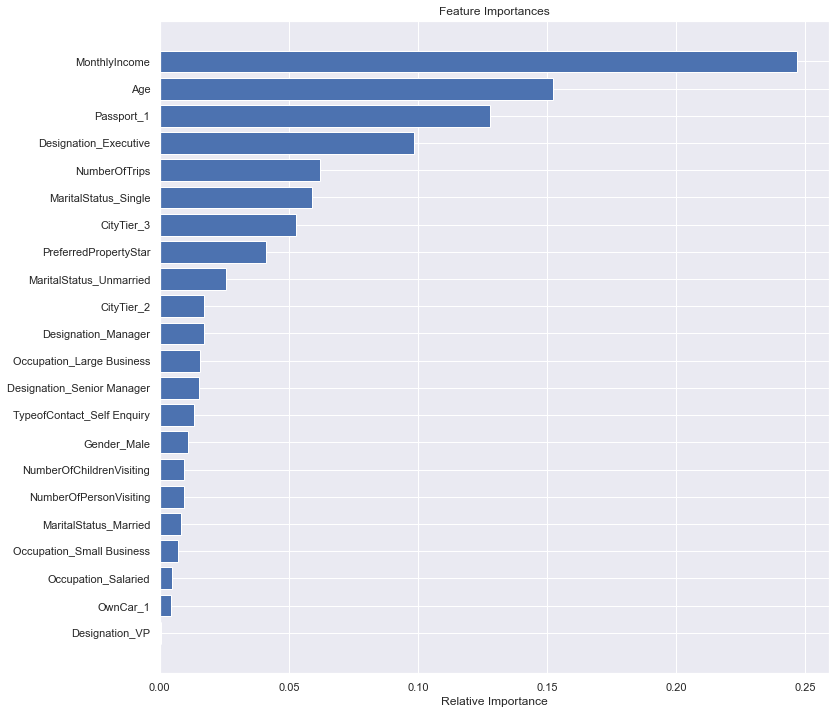

In [122]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Model is performing some what same on both training and test data
* Recall on the test data is low
* Most important feature is MonthlyIncome, Age, Passport and Designation_Executive.

### XGBoost Classifier

In [123]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,50,100],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.001,0.01,0.1,0.5],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.86846  0.900621   0.600414  0.720497
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.795501  0.735507   0.472093  0.575071


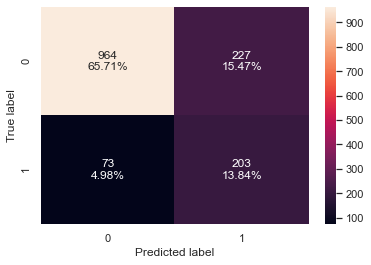

In [124]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [125]:
# The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
Passport_1                  0.270980
Designation_Executive       0.118495
MaritalStatus_Single        0.109895
MaritalStatus_Unmarried     0.060123
MonthlyIncome               0.046452
Age                         0.041574
Occupation_Large Business   0.036358
CityTier_2                  0.035020
CityTier_3                  0.033003
PreferredPropertyStar       0.031327
NumberOfTrips               0.028374
Occupation_Small Business   0.025292
Designation_Senior Manager  0.023148
TypeofContact_Self Enquiry  0.022324
Gender_Male                 0.021691
Designation_VP              0.018699
NumberOfChildrenVisiting    0.018073
NumberOfPersonVisiting      0.018022
MaritalStatus_Married       0.015391
OwnCar_1                    0.014892
Occupation_Salaried         0.010868
Designation_Manager         0.000000


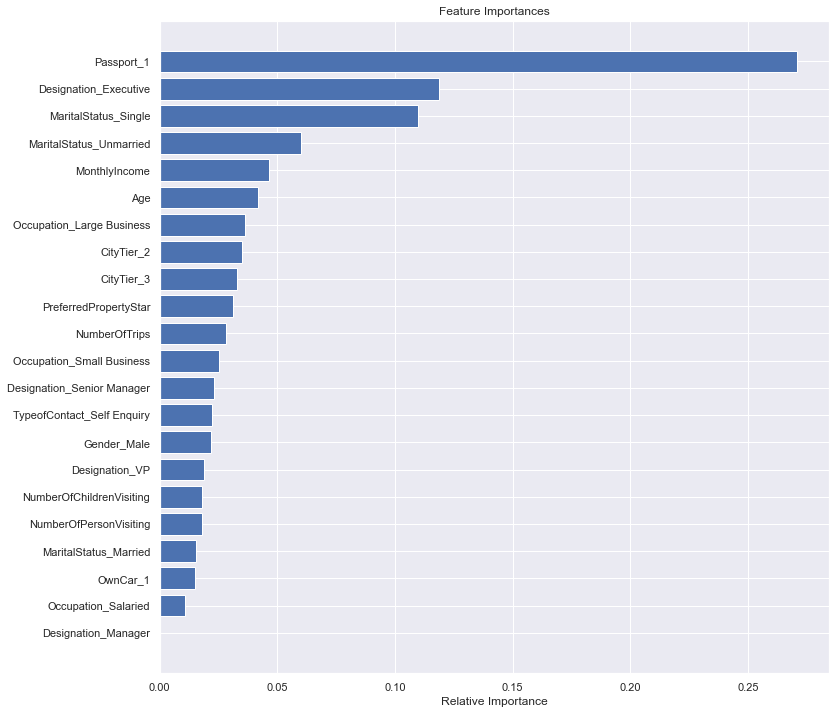

In [126]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**
* Recall on this model on test data is decreased to 0.73 from 0.90 on training data. But this recall is slightly better than other models
* Most important feature is Passport,MartialStatus_Single, MartialStatus_Unmarried, MonthlyIncome and  Age

### Stacking Classifier

In [127]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]
final_estimator = xgb_tuned
stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=5,
                                                       max_samples=0.3,
                                                       min_samples_leaf=9,
                                                       n_estimators=50,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=1,
                                                    

Training performance:
    Accuracy   Recall  Precision        F1
0  0.862321  0.82764   0.596865  0.693559
Testing performance:
    Accuracy    Recall  Precision      F1
0  0.817996  0.724638   0.511509  0.5997


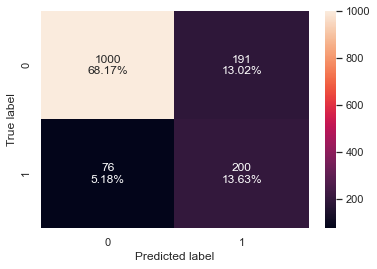

In [128]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

**Observation**
* This model is the best model so far.
* Model is performing equally on both training and test data.
* Recall for this mode on training is also good (0.72), though it got slightly decreased as compared to training data 

### Comparing all models

In [129]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

In [130]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

In [131]:
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Decision Tree Tuned,0.742181,0.690994,0.394504,0.502257
Random Forest Estimator,1.000000,1.000000,1.000000,1.000000
Random Forest Tuned,0.815843,0.636646,0.508685,0.565517
Bagging Classifier,0.991231,0.956522,0.996764,0.976228
Bagging Estimator Tuned,0.899152,0.816770,0.698539,0.753042
Adaboost Classifier,0.844198,0.277950,0.724696,0.401796
Adabosst Classifier Tuned,0.985969,0.947205,0.977564,0.962145
Gradient Boost Classifier,0.880152,0.431677,0.863354,0.575569
Gradient Boost Classifier Tuned,0.909968,0.572981,0.917910,0.705545


In [132]:
print("Testing performance comparison:")
models_test_comp_df.T.sort_values(by='Recall',ascending=False)

Testing performance comparison:


,Accuracy,Recall,Precision,F1
XGBoost Classifier Tuned,0.795501,0.735507,0.472093,0.575071
Stacking Classifier,0.817996,0.724638,0.511509,0.599700
Decision Tree Tuned,0.742331,0.713768,0.397177,0.510363
Random Forest Tuned,0.823449,0.659420,0.524496,0.584270
XGBoost Classifier,0.903204,0.630435,0.813084,0.710204
Decision Tree,0.867076,0.623188,0.653992,0.638219
Bagging Estimator Tuned,0.802999,0.590580,0.480826,0.530081
Adabosst Classifier Tuned,0.871847,0.557971,0.700000,0.620968
Bagging Classifier,0.894342,0.543478,0.837989,0.659341
Random Forest Estimator,0.895024,0.496377,0.901316,0.640187


**Observation**
* Decision Tree Tuned model seems to be perform better on test data as compared to other models and its recall is also better 0.71 on test data 
* XGBoost Classifier Tuned and Stacking Classifier although they have higher recall value on test data but their value on training data was even more and recall value difference in training and test data was high. These model can do better by further tuning.
* Adaboost Classifier is the worst model

## Actionable Insights & Recommendations
### Insights
* Most important features that determines whether Product will be taken or not are Passport, Desgination, CityTier,MartialStatus and MonthlyIncome, Occupation
* Most sold product is Basic
* Most customers who bought product is in the age group 21-35
* Most customers who bought product is single and unmarried
* Most of the customers who bought product is Executive

### Recommendations
* Single or unmarried Customers from CityTier_3 with Designation Executive or Manager is more likly to take product, they should be the tareget of the compaign.
* Target group for Basic Product should be Salaried Executive in the age group of 21-35
* Target group of Income as per past record is less than equal to 40000
* Customer with 1 or no kid is likly to take the product as compared to customers with more kids.
* Inorder to increase customer base and product adoption - company can start discount for Female customers and Family. Current customer base is mostly Male and single/Unmarried people.